### Task 1: reproducing Eleanor's plot for GR-AP1 analysis

In [1]:
%%bash
python /hpc/group/igvf/K562/leave-one-out/BlueSTARR/test-variants-fc.py \
/hpc/group/igvf/SHARED/trained-models/A549_DMSO-4 \
/hpc/group/igvf/SHARED/trained-models/A549_Dex-4 \
/hpc/group/igvf/A549/GR-AP1/enhancer-seq/original-seq/original-seq.txt \
/hpc/home/rv103/revathy/majoros_lab/BlueSTARR/results/GR-AP1/logFC/original-seq-fc3.txt

2025-04-30 13:50:09.608538: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-30 13:50:09.667058: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-30 13:50:09.667754: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-30 13:50:15.532457: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2025-04-30 13:50:26.886286: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [3]:
%%bash
for i in {1..10};
do 
python /hpc/group/igvf/K562/leave-one-out/BlueSTARR/test-variants-fc.py \
/hpc/group/igvf/A549/full-set/DMSO-200/300-bases/slurms/train-unbiased-normalized/DMSO-${i} \
/hpc/group/igvf/A549/full-set/Dex-200/300-bases/slurms/train-unbiased-normalized/Dex-${i} \
/hpc/group/igvf/A549/GR-AP1/enhancer-seq/original-seq/original-seq.txt \
/hpc/home/rv103/revathy/majoros_lab/BlueSTARR/results/GR-AP1/logFC/DMSO_DEX_${i}_original-seq-fc3.txt
done



2025-05-01 11:10:43.308247: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-01 11:10:43.366992: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-01 11:10:43.367981: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-01 11:10:48.446231: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2025-05-01 11:10:57.097541: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-05-01 11:11:02.692736: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your mach

In [32]:
%%bash
python /hpc/group/igvf/K562/leave-one-out/BlueSTARR/test-variants-fc.py \
/hpc/group/igvf/A549/full-set/DMSO-200 \
/hpc/group/igvf/A549/full-set/Dex-200 \
/hpc/group/igvf/A549/GR-AP1/enhancer-seq/original-seq/original-seq.txt \
/hpc/home/rv103/revathy/majoros_lab/BlueSTARR/results/GR-AP1/logFC/original-seq-old.txt

2025-05-01 13:03:01.027894: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-01 13:03:01.081022: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-01 13:03:01.082644: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-01 13:03:06.975841: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2025-05-01 13:03:19.055597: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


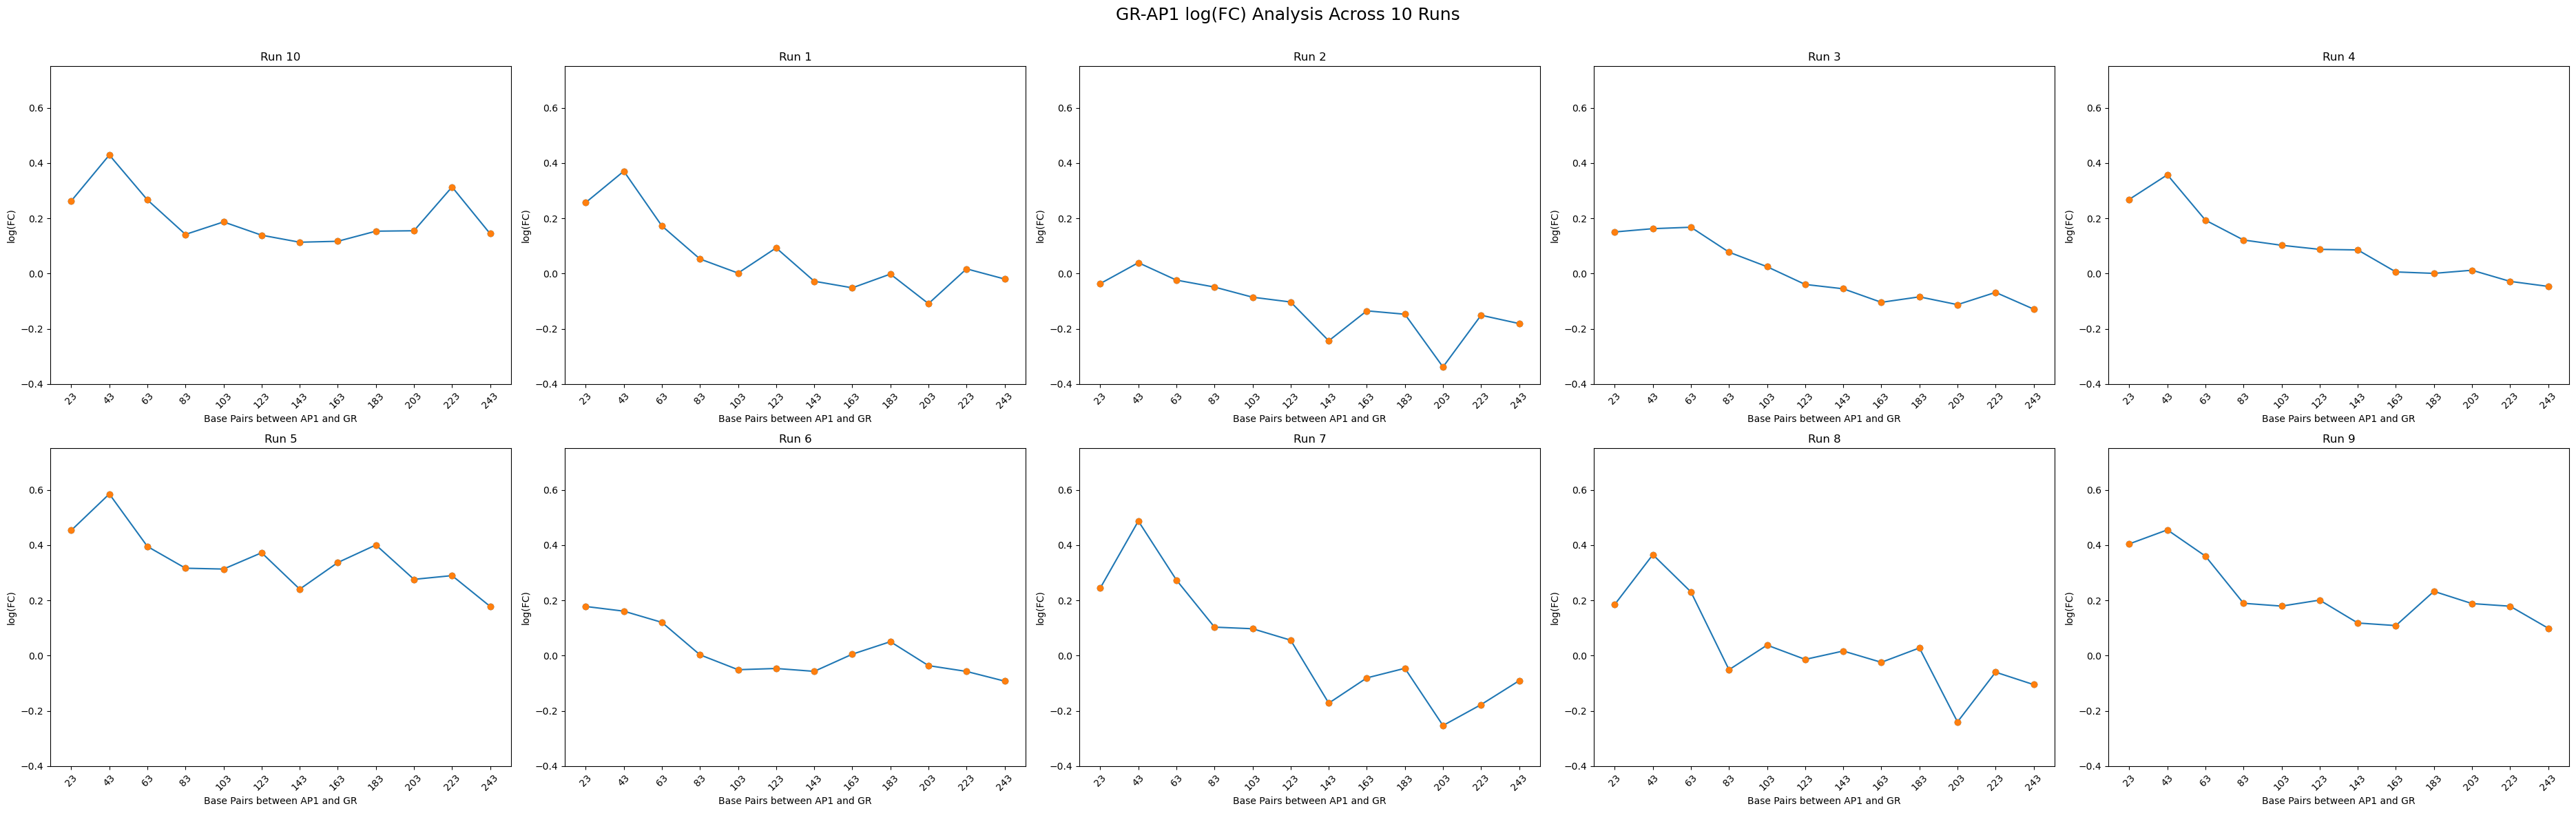

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

data_dir = "/hpc/home/rv103/revathy/majoros_lab/BlueSTARR/results/GR-AP1/logFC/"
file_pattern = os.path.join(data_dir, "DMSO_DEX_*_original-seq-fc3.txt")
file_list = sorted(glob.glob(file_pattern))

fig, axs = plt.subplots(2, 5, figsize=(37.5, 12))
axs = axs.flatten()  

for idx, file_path in enumerate(file_list):
    df = pd.read_table(file_path, header=None)
    df.columns = ['location', 'DMSO.refScore', 'Dex.refScore', 'sequence']
    
    df['fc'] = df['Dex.refScore'] - df['DMSO.refScore']
    df['dist'] = np.tile(np.arange(23, 244, 20), 1)
    
    df = df.groupby('dist').agg(mean_fc=('fc', 'mean'), sd_fc=('fc', 'std')).reset_index()

    run_id = os.path.basename(file_path).split('_')[2]

    ax = axs[idx]
    ax.plot(df['dist'], df['mean_fc'], marker='o')
    ax.errorbar(df['dist'], df['mean_fc'], yerr=df['sd_fc'], fmt='o', capsize=5)
    ax.set_title(f"Run {run_id}")
    ax.set_xlabel("Base Pairs between AP1 and GR")
    ax.set_ylabel("log(FC)")
    ax.set_ylim(-0.4, 0.75)
    ax.set_xticks(np.arange(23, 244, 20))
    ax.tick_params(axis='x', rotation=45)
    ax.grid(False)

for i in range(len(file_list), len(axs)):
    fig.delaxes(axs[i])

fig.suptitle("GR-AP1 log(FC) Analysis Across 10 Runs", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


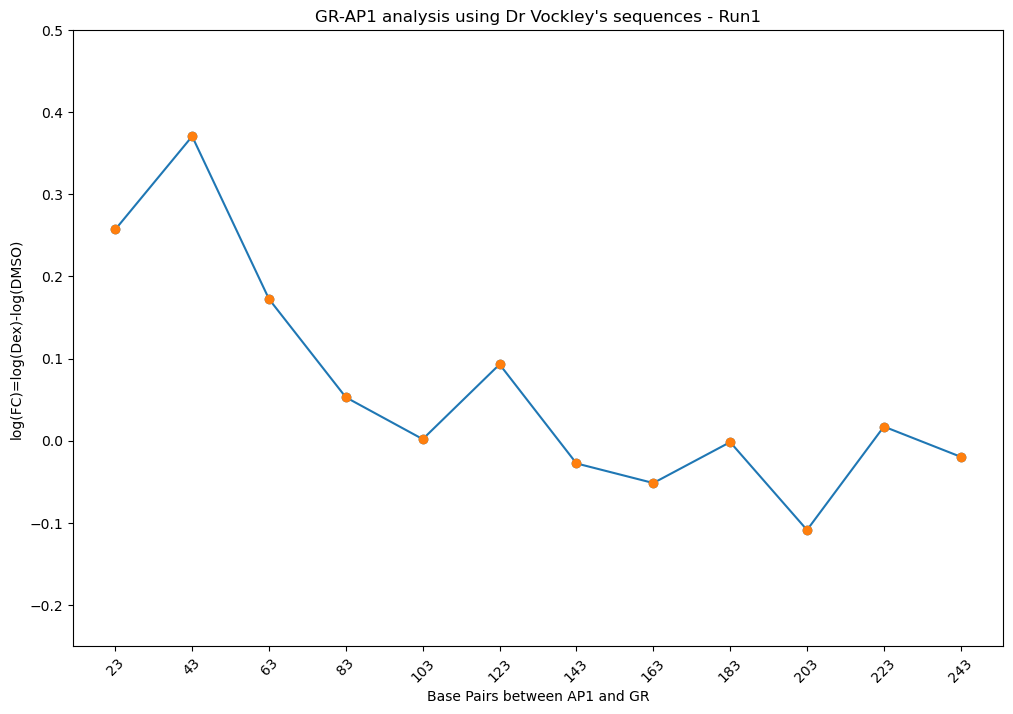

In [29]:
df = pd.read_table('/hpc/home/rv103/revathy/majoros_lab/BlueSTARR/results/GR-AP1/logFC/DMSO_DEX_1_original-seq-fc3.txt',header = None)
df.columns = ['location', 'DMSO.refScore', 'Dex.refScore','sequence'] # log scale
df['fc'] = df['Dex.refScore']-df['DMSO.refScore']
# df['fc'] = np.exp(df['Dex.refScore'])/np.exp(df['DMSO.refScore'])

df['dist'] = np.tile(np.arange(23, 244, 20), 1)
df = df.groupby('dist').agg(mean_fc=('fc', 'mean'), sd_fc=('fc', 'std')).reset_index()
x = range(23, 244, 20)
plt.figure(figsize=(12, 8))
plt.plot(df['dist'], df['mean_fc'], marker='o')
plt.title("GR-AP1 analysis using Dr Vockley's sequences - Run1")
plt.xlabel("Base Pairs between AP1 and GR")
plt.ylabel("log(FC)=log(Dex)-log(DMSO)")
plt.ylim(-0.25,0.5)
plt.errorbar(df['dist'], df['mean_fc'], yerr=df['sd_fc'], fmt='o', capsize=5)
plt.xticks(np.arange(23, 244, 20), rotation=45)
plt.show()

In [31]:
!head /hpc/home/rv103/revathy/majoros_lab/BlueSTARR/results/GR-AP1/logFC/DMSO_DEX_1_original-seq-fc3.txt

seq1	0.57379407	0.8309516	ACCTGAGCTCGCTAGCCTCGAGGATCTTGGCAGTACTCCCAGTTCTGACAGGCGTGACTCATAGTCCATCACTCTGTCACCTAGGCTGGAGTGCAGTGGTGCAATCTCAGCTCACTGCAACCTCCACCTCTCAGGCTCAAGCGATCCTCCCACCTTGGTCTCCCGAGTAGCTGGGACCACAGGCGTAGTCCACCTGGCTAATTTTTTGTATCTTTTGGTAGAGATGGGATTTTGCCACGTGGCCGGGACTGGTCTCAAACTCCTGAGCTCAAGCGATTTGCCTGTCTAATCAAGATCTGG
seq2	0.55102634	0.92158914	ACCTGAGCTCGCTAGCCTCGAGGATCTTGGCAGTACTCCCAGTTCTGTCACTCTGTCACCTAGGCTGACAGGCGTGACTCATAGTCCAGAGTGCAGTGGTGCAATCTCAGCTCACTGCAACCTCCACCTCTCAGGCTCAAGCGATCCTCCCACCTTGGTCTCCCGAGTAGCTGGGACCACAGGCGTAGTCCACCTGGCTAATTTTTTGTATCTTTTGGTAGAGATGGGATTTTGCCACGTGGCCGGGACTGGTCTCAAACTCCTGAGCTCAAGCGATTTGCCTGTCTAATCAAGATCTGG
seq3	0.56665146	0.73902094	ACCTGAGCTCGCTAGCCTCGAGGATCTTGGCAGTACTCCCAGTTCTGTCACTCTGTCACCTAGGCTGGAGTGCAGTGGTGCAATCTCACAGGCGTGACTCATAGTCCAAGCTCACTGCAACCTCCACCTCTCAGGCTCAAGCGATCCTCCCACCTTGGTCTCCCGAGTAGCTGGGACCACAGGCGTAGTCCACCTGGCTAATTTTTTGTATCTTTTGGTAGAGATGGGATTTTGCCACGTGGCCGGGACTGGTCTCAAACTCCTGAGCTCAAGCGATTTGCCTGTCTAATCAAGATCTGG
seq4	0.57931256	0

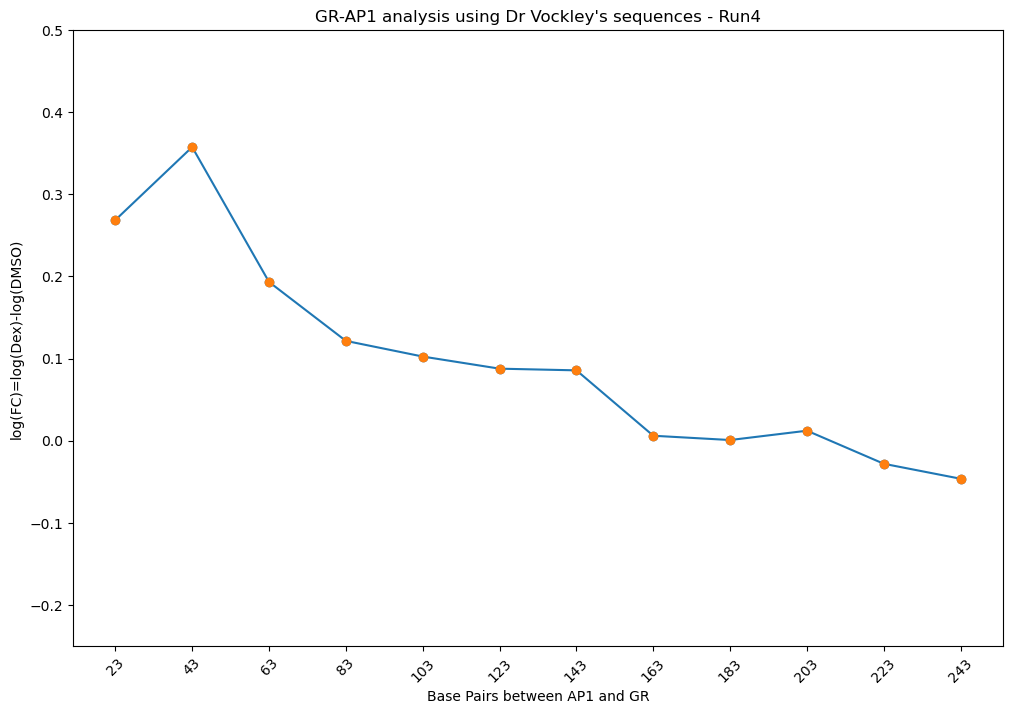

In [30]:
df = pd.read_table('/hpc/home/rv103/revathy/majoros_lab/BlueSTARR/results/GR-AP1/logFC/DMSO_DEX_4_original-seq-fc3.txt',header = None)
df.columns = ['location', 'DMSO.refScore', 'Dex.refScore','sequence'] # log scale
df['fc'] = df['Dex.refScore']-df['DMSO.refScore']
# df['fc'] = np.exp(df['Dex.refScore'])/np.exp(df['DMSO.refScore'])

df['dist'] = np.tile(np.arange(23, 244, 20), 1)
df = df.groupby('dist').agg(mean_fc=('fc', 'mean'), sd_fc=('fc', 'std')).reset_index()
x = range(23, 244, 20)
plt.figure(figsize=(12, 8))
plt.plot(df['dist'], df['mean_fc'], marker='o')
plt.title("GR-AP1 analysis using Dr Vockley's sequences - Run4")
plt.xlabel("Base Pairs between AP1 and GR")
plt.ylabel("log(FC)=log(Dex)-log(DMSO)")
plt.ylim(-0.25,0.5)
plt.errorbar(df['dist'], df['mean_fc'], yerr=df['sd_fc'], fmt='o', capsize=5)
plt.xticks(np.arange(23, 244, 20), rotation=45)
plt.show()

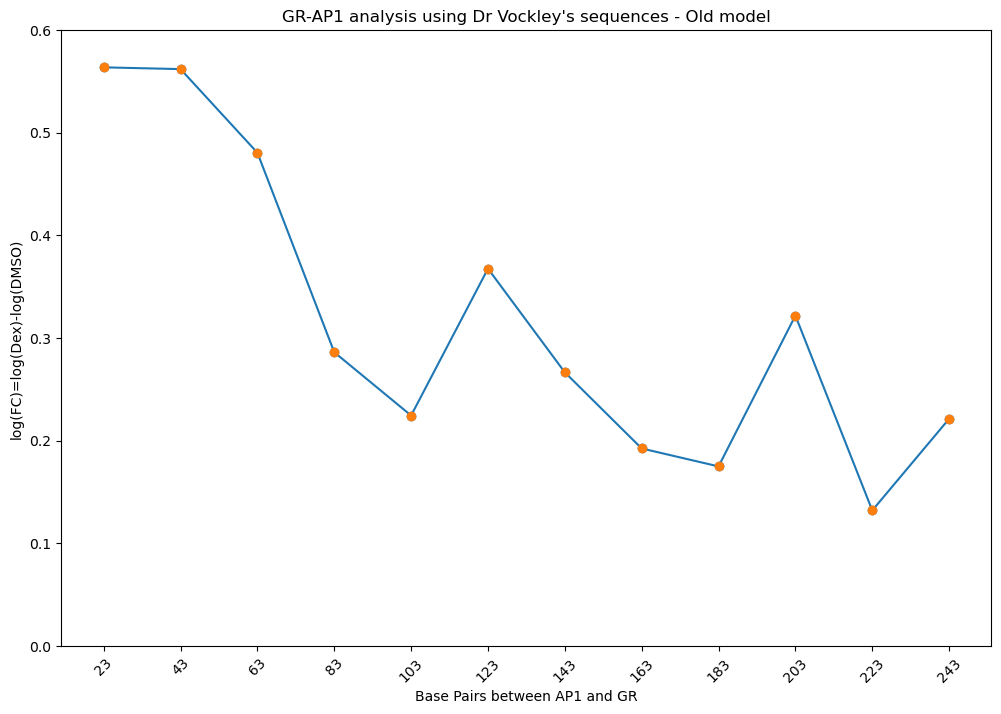

In [36]:
df = pd.read_table('/hpc/home/rv103/revathy/majoros_lab/BlueSTARR/results/GR-AP1/logFC/original-seq-old.txt',header = None)
df.columns = ['location', 'DMSO.refScore', 'Dex.refScore','sequence'] # log scale
df['fc'] = df['Dex.refScore']-df['DMSO.refScore']
# df['fc'] = np.exp(df['Dex.refScore'])/np.exp(df['DMSO.refScore'])

df['dist'] = np.tile(np.arange(23, 244, 20), 1)
df = df.groupby('dist').agg(mean_fc=('fc', 'mean'), sd_fc=('fc', 'std')).reset_index()
x = range(23, 244, 20)
plt.figure(figsize=(12, 8))
plt.plot(df['dist'], df['mean_fc'], marker='o')
plt.title("GR-AP1 analysis using Dr Vockley's sequences - Old model")
plt.xlabel("Base Pairs between AP1 and GR")
plt.ylabel("log(FC)=log(Dex)-log(DMSO)")
plt.ylim(0.0,0.6)
plt.errorbar(df['dist'], df['mean_fc'], yerr=df['sd_fc'], fmt='o', capsize=5)
plt.xticks(np.arange(23, 244, 20), rotation=45)
plt.show()

#### Recomputing naive theta estimates

In [1]:
%%bash
python /hpc/group/igvf/K562/leave-one-out/BlueSTARR/leave-one-out/downsampling/theta.py \
/hpc/home/rv103/igvf/SHARED/trained-models/A549_Dex-4_data/train-counts.txt.gz \
/hpc/home/rv103/revathy/majoros_lab/BlueSTARR/results/GR-AP1/A549_Dex-4-naive-theta.txt

In [5]:
%%bash
python /hpc/group/igvf/K562/leave-one-out/BlueSTARR/leave-one-out/downsampling/theta.py \
/hpc/home/rv103/igvf/SHARED/trained-models/A549_DMSO-4_data/train-counts.txt.gz \
/hpc/home/rv103/revathy/majoros_lab/BlueSTARR/results/GR-AP1/A549_DMSO-4-naive-theta.txt

In [4]:
!head /hpc/home/rv103/revathy/majoros_lab/BlueSTARR/results/GR-AP1/A549_Dex-4-naive-theta.txt

1.4958661478867612
1.572385191498217
1.6193935031517706
1.6577618818365247
1.6771601997878833
1.6714686425374827
1.6674549235476621
1.660464228746134
1.650805737026405
2.926243977241116


In [6]:
%%bash
awk '
BEGIN {min="unset"; max=0; sum=0; count=0}
{
  sum += $1
  count += 1
  if (min == "unset" || $1 < min) min = $1
  if ($1 > max) max = $1
}
END {
  if (count > 0) {
    print "Count:", count
    print "Sum:", sum
    print "Mean:", sum/count
    print "Min:", min
    print "Max:", max
  } else {
    print "No data"
  }
}' /hpc/home/rv103/revathy/majoros_lab/BlueSTARR/results/GR-AP1/A549_Dex-4-naive-theta.txt


Count: 1681528
Sum: 3.78444e+06
Mean: 2.25059
Min: 0.22950127768416975
Max: 106.99064992109871


In [7]:
%%bash
awk '
BEGIN {min="unset"; max=0; sum=0; count=0}
{
  sum += $1
  count += 1
  if (min == "unset" || $1 < min) min = $1
  if ($1 > max) max = $1
}
END {
  if (count > 0) {
    print "Count:", count
    print "Sum:", sum
    print "Mean:", sum/count
    print "Min:", min
    print "Max:", max
  } else {
    print "No data"
  }
}' /hpc/home/rv103/revathy/majoros_lab/BlueSTARR/results/GR-AP1/A549_DMSO-4-naive-theta.txt


Count: 1650082
Sum: 3.44214e+06
Mean: 2.08604
Min: 0.3150763872383921
Max: 87.29142647005011


In [9]:
import pandas as pd
import numpy as np

dex_naive_theta = pd.read_csv('/hpc/home/rv103/revathy/majoros_lab/BlueSTARR/results/GR-AP1/A549_Dex-4-naive-theta.txt', names=['naive_theta'])
dex_naive_theta['log_theta'] = np.log2(dex_naive_theta['naive_theta'])
dex_naive_theta.describe()

naive_theta     log_theta
count  1.681528e+06  1.681528e+06
mean   2.250594e+00  8.787932e-01
std    2.233534e+00  8.080431e-01
min    2.295013e-01 -2.123426e+00
25%    1.247337e+00  3.188514e-01
50%    1.655505e+00  7.272717e-01
75%    2.424759e+00  1.277841e+00
max    1.069906e+02  6.741341e+00

## GR-AP1 analysis using the new 30 models (Custom loss and MSE loss)


Custom loss models:
- Dex (only has 10 models): `/hpc/home/rv103/igvf/revathy/models/custom_loss/Dex-200`
- DMSO (has 30 models): `/hpc/home/rv103/igvf/revathy/models/custom_loss/DMSO-200`

MSE loss models:
- Dex (only 10 models): `/hpc/home/rv103/igvf/revathy/models/mse_loss/Dex-200`
- DMSO (has 30 models): `/hpc/home/rv103/igvf/revathy/models/mse_loss/DMSO-200`

In [1]:
%%bash
for i in {1..10};
do 
python /hpc/group/igvf/K562/leave-one-out/BlueSTARR/test-variants-fc.py \
/hpc/home/rv103/igvf/revathy/models/custom_loss/DMSO-200/DMSO-${i} \
/hpc/home/rv103/igvf/revathy/models/custom_loss/Dex-200/Dex-${i} \
/hpc/group/igvf/A549/GR-AP1/enhancer-seq/original-seq/original-seq.txt \
/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_DEX_CustomLoss_${i}_original-seq-fc3.txt
done


2025-05-22 12:44:53.100447: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 12:44:53.100565: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 12:44:53.511738: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 12:44:54.667404: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 12:45:15.437880: W tensorflow/comp

Using TensorFlow backend


Traceback (most recent call last):
  File "/hpc/group/igvf/K562/leave-one-out/BlueSTARR/test-variants-fc.py", line 162, in <module>
    main(infile,modelFilestem1,modelFilestem2,output_dir)
  File "/hpc/group/igvf/K562/leave-one-out/BlueSTARR/test-variants-fc.py", line 59, in main
    with open(modelFilestem1+'.json', "r") as json_file:
FileNotFoundError: [Errno 2] No such file or directory: '/hpc/home/rv103/igvf/revathy/models/custom_loss/DMSO-200/DMSO-1.json'
2025-05-22 12:46:11.706156: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 12:46:11.706221: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 12:46:11.707645: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register c

Using TensorFlow backend


2025-05-22 12:46:33.391696: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 12:46:33.391795: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 12:46:33.393678: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 12:46:33.403689: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 12:46:35.924372: W tensorflow/comp

Using TensorFlow backend


2025-05-22 12:46:53.206856: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 12:46:53.206932: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 12:46:53.208388: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 12:46:53.215693: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 12:46:55.466605: W tensorflow/comp

Using TensorFlow backend


2025-05-22 12:47:13.107195: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 12:47:13.107255: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 12:47:13.108644: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 12:47:13.117625: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 12:47:15.461915: W tensorflow/comp

Using TensorFlow backend


2025-05-22 12:47:32.672080: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 12:47:32.672780: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 12:47:32.675018: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 12:47:32.681782: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 12:47:34.899138: W tensorflow/comp

Using TensorFlow backend


2025-05-22 12:47:52.153222: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 12:47:52.153280: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 12:47:52.154665: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 12:47:52.161224: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 12:47:54.196316: W tensorflow/comp

Using TensorFlow backend


2025-05-22 12:48:10.660244: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 12:48:10.660302: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 12:48:10.661671: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 12:48:10.671143: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 12:48:12.953526: W tensorflow/comp

Using TensorFlow backend


2025-05-22 12:48:30.012947: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 12:48:30.013017: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 12:48:30.014672: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 12:48:30.022033: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 12:48:32.411945: W tensorflow/comp

Using TensorFlow backend


2025-05-22 12:48:50.421606: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 12:48:50.421662: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 12:48:50.423274: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 12:48:50.430274: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 12:48:52.586186: W tensorflow/comp

Using TensorFlow backend


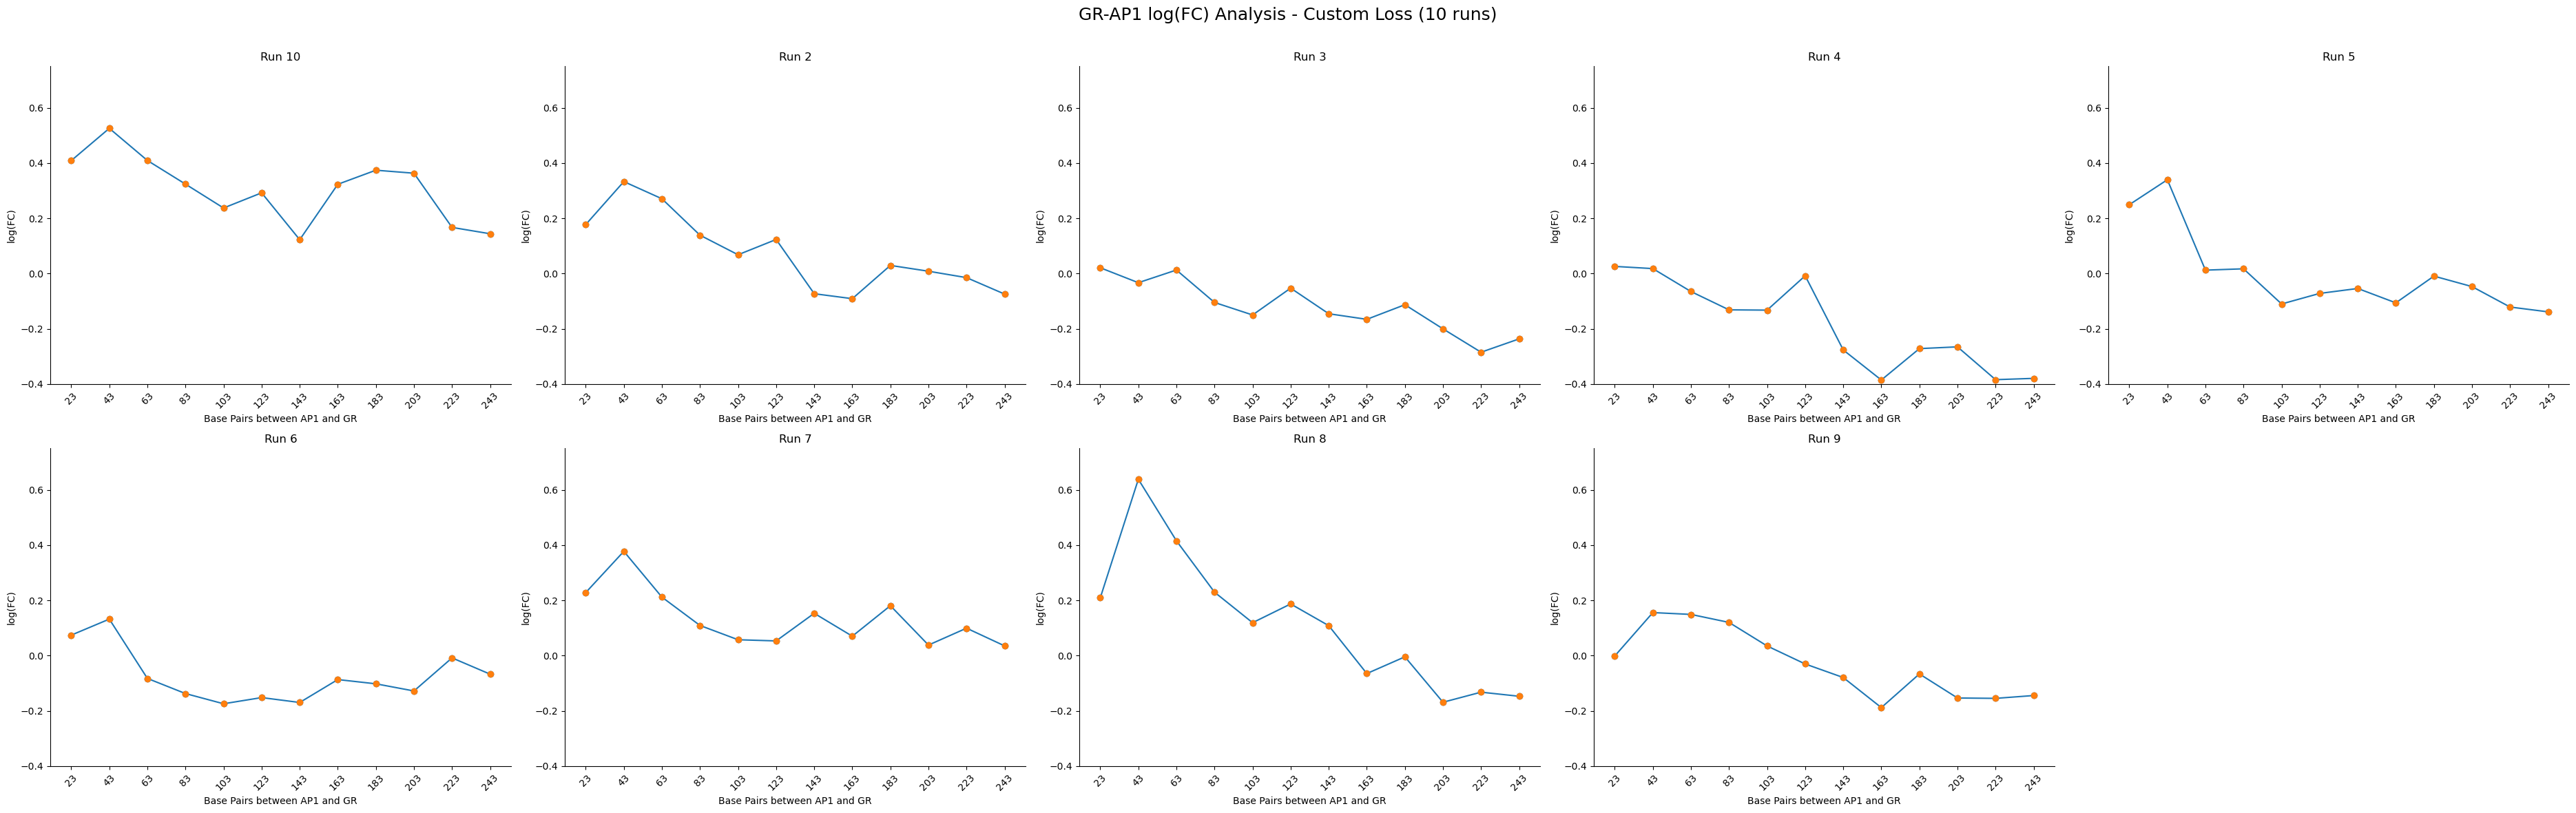

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import os

data_dir = "/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/"
file_pattern = os.path.join(data_dir, "DMSO_DEX_CustomLoss_*_original-seq-fc3.txt")
file_list = sorted(glob.glob(file_pattern))

fig, axs = plt.subplots(2, 5, figsize=(37.5, 12))
axs = axs.flatten()  

for idx, file_path in enumerate(file_list):
    df = pd.read_table(file_path, header=None)
    df.columns = ['location', 'DMSO.refScore', 'Dex.refScore', 'sequence']
    
    df['fc'] = df['Dex.refScore'] - df['DMSO.refScore']
    df['dist'] = np.tile(np.arange(23, 244, 20), 1)
    
    df = df.groupby('dist').agg(mean_fc=('fc', 'mean'), sd_fc=('fc', 'std')).reset_index()

    run_id = os.path.basename(file_path).split('_')[3]

    ax = axs[idx]
    ax.plot(df['dist'], df['mean_fc'], marker='o')
    ax.errorbar(df['dist'], df['mean_fc'], yerr=df['sd_fc'], fmt='o', capsize=5)
    ax.set_title(f"Run {run_id}")
    ax.set_xlabel("Base Pairs between AP1 and GR")
    ax.set_ylabel("log(FC)")
    ax.set_ylim(-0.4, 0.75)
    ax.set_xticks(np.arange(23, 244, 20))
    ax.tick_params(axis='x', rotation=45)
    ax.grid(False)

for i in range(len(file_list), len(axs)):
    fig.delaxes(axs[i])

fig.suptitle("GR-AP1 log(FC) Analysis - Custom Loss (10 runs)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
sns.despine()
plt.show()


In [5]:
%%bash
for i in {1..10};
do 
python /hpc/group/igvf/K562/leave-one-out/BlueSTARR/test-variants-fc.py \
/hpc/home/rv103/igvf/revathy/models/mse_loss/DMSO-200/DMSO-${i} \
/hpc/home/rv103/igvf/revathy/models/mse_loss/Dex-200/Dex-${i} \
/hpc/group/igvf/A549/GR-AP1/enhancer-seq/original-seq/original-seq.txt \
/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_DEX_MSELoss_${i}_original-seq-fc3.txt
done


2025-05-22 12:51:17.146965: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 12:51:17.147025: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 12:51:17.149907: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 12:51:17.163156: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 12:51:19.707033: W tensorflow/comp

Using TensorFlow backend


Traceback (most recent call last):
  File "/hpc/group/igvf/K562/leave-one-out/BlueSTARR/test-variants-fc.py", line 162, in <module>
    main(infile,modelFilestem1,modelFilestem2,output_dir)
  File "/hpc/group/igvf/K562/leave-one-out/BlueSTARR/test-variants-fc.py", line 59, in main
    with open(modelFilestem1+'.json', "r") as json_file:
FileNotFoundError: [Errno 2] No such file or directory: '/hpc/home/rv103/igvf/revathy/models/mse_loss/DMSO-200/DMSO-1.json'
2025-05-22 12:51:29.679071: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 12:51:29.679128: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 12:51:29.680775: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBL

Using TensorFlow backend


2025-05-22 12:51:48.294645: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 12:51:48.294740: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 12:51:48.296238: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 12:51:48.303238: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 12:51:50.378807: W tensorflow/comp

Using TensorFlow backend


2025-05-22 12:52:07.945818: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 12:52:07.945882: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 12:52:07.947235: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 12:52:07.953935: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 12:52:10.474212: W tensorflow/comp

Using TensorFlow backend


2025-05-22 12:52:35.333972: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 12:52:35.334305: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 12:52:35.335727: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 12:52:35.342529: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 12:52:37.750689: W tensorflow/comp

Using TensorFlow backend


2025-05-22 12:52:56.180125: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 12:52:56.180187: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 12:52:56.181530: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 12:52:56.188218: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 12:52:58.380496: W tensorflow/comp

Using TensorFlow backend


2025-05-22 12:53:15.181600: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 12:53:15.181658: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 12:53:15.183030: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 12:53:15.189897: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 12:53:17.331995: W tensorflow/comp

Using TensorFlow backend


2025-05-22 12:53:34.191128: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 12:53:34.191208: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 12:53:34.192643: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 12:53:34.199790: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 12:53:36.448170: W tensorflow/comp

Using TensorFlow backend


2025-05-22 12:53:53.022370: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 12:53:53.022441: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 12:53:53.023872: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 12:53:53.031081: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 12:53:55.500230: W tensorflow/comp

Using TensorFlow backend


2025-05-22 12:54:13.516731: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 12:54:13.516793: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 12:54:13.518220: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 12:54:13.526151: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 12:54:15.717078: W tensorflow/comp

Using TensorFlow backend


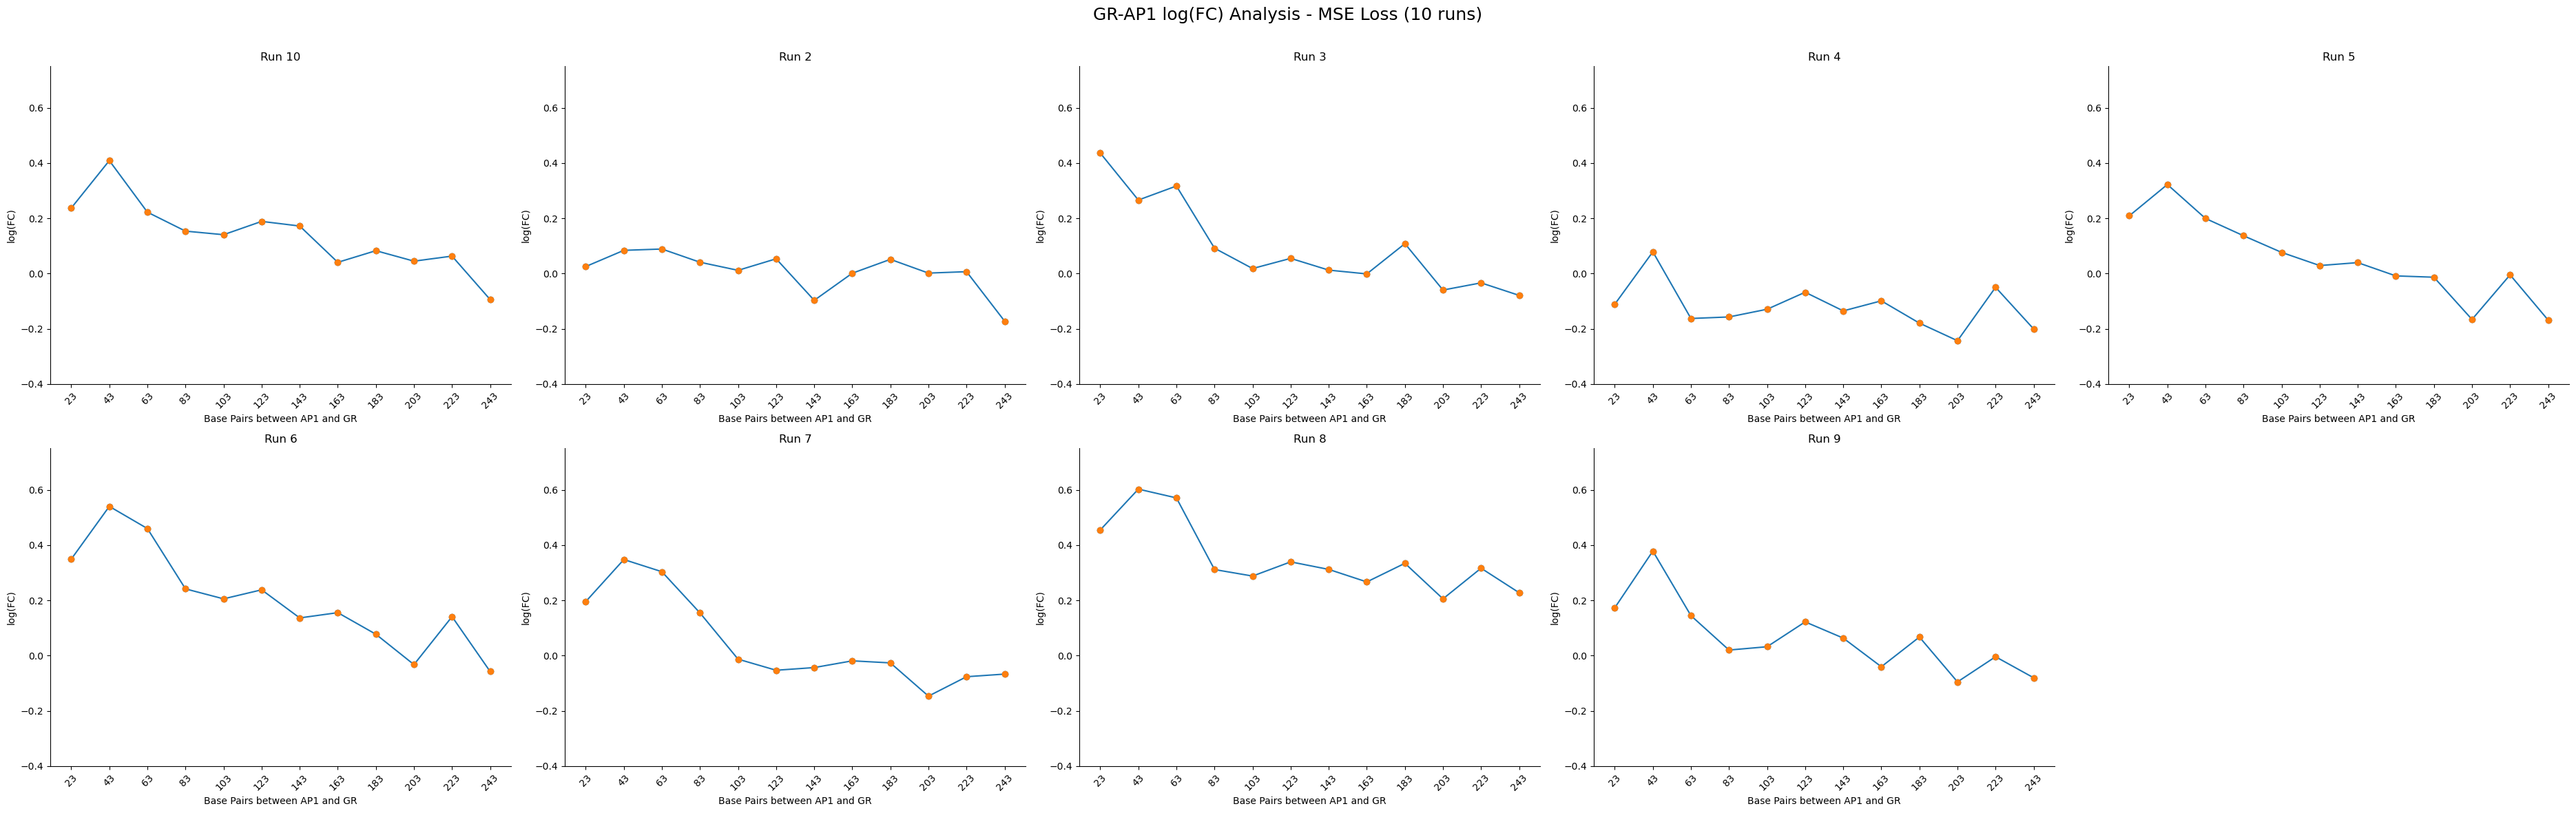

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

data_dir = "/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/"
file_pattern = os.path.join(data_dir, "DMSO_DEX_MSELoss_*_original-seq-fc3.txt")
file_list = sorted(glob.glob(file_pattern))

fig, axs = plt.subplots(2, 5, figsize=(37.5, 12))
axs = axs.flatten()  

for idx, file_path in enumerate(file_list):
    df = pd.read_table(file_path, header=None)
    df.columns = ['location', 'DMSO.refScore', 'Dex.refScore', 'sequence']
    
    df['fc'] = df['Dex.refScore'] - df['DMSO.refScore']
    df['dist'] = np.tile(np.arange(23, 244, 20), 1)
    
    df = df.groupby('dist').agg(mean_fc=('fc', 'mean'), sd_fc=('fc', 'std')).reset_index()

    run_id = os.path.basename(file_path).split('_')[3]

    ax = axs[idx]
    ax.plot(df['dist'], df['mean_fc'], marker='o')
    ax.errorbar(df['dist'], df['mean_fc'], yerr=df['sd_fc'], fmt='o', capsize=5)
    ax.set_title(f"Run {run_id}")
    ax.set_xlabel("Base Pairs between AP1 and GR")
    ax.set_ylabel("log(FC)")
    ax.set_ylim(-0.4, 0.75)
    ax.set_xticks(np.arange(23, 244, 20))
    ax.tick_params(axis='x', rotation=45)
    ax.grid(False)

for i in range(len(file_list), len(axs)):
    fig.delaxes(axs[i])

fig.suptitle("GR-AP1 log(FC) Analysis - MSE Loss (10 runs)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
sns.despine()
plt.show()


#### Fixing the Dex model to the already existing one and experimenting on the DMSO model

Dex model: `/hpc/group/igvf/SHARED/trained-models/A549_Dex-4`


In [8]:
%%bash
for i in {1..30};
do 
python /hpc/group/igvf/K562/leave-one-out/BlueSTARR/test-variants-fc.py \
/hpc/home/rv103/igvf/revathy/models/mse_loss/DMSO-200/DMSO-${i} \
/hpc/group/igvf/SHARED/trained-models/A549_Dex-4 \
/hpc/group/igvf/A549/GR-AP1/enhancer-seq/original-seq/original-seq.txt \
/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_Dex4_MSELoss_${i}_original-seq-fc3.txt
done


2025-05-22 13:00:55.553957: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:00:55.554007: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:00:55.556724: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:00:55.563853: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:00:58.482482: W tensorflow/comp

Using TensorFlow backend


Traceback (most recent call last):
  File "/hpc/group/igvf/K562/leave-one-out/BlueSTARR/test-variants-fc.py", line 162, in <module>
    main(infile,modelFilestem1,modelFilestem2,output_dir)
  File "/hpc/group/igvf/K562/leave-one-out/BlueSTARR/test-variants-fc.py", line 59, in main
    with open(modelFilestem1+'.json', "r") as json_file:
FileNotFoundError: [Errno 2] No such file or directory: '/hpc/home/rv103/igvf/revathy/models/mse_loss/DMSO-200/DMSO-1.json'
2025-05-22 13:01:09.487173: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:01:09.487226: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:01:09.488466: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBL

Using TensorFlow backend


2025-05-22 13:01:34.660020: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:01:34.660086: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:01:34.661490: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:01:34.718765: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:01:37.756917: W tensorflow/comp

Using TensorFlow backend


2025-05-22 13:02:00.052670: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:02:00.052738: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:02:00.054737: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:02:00.064361: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:02:03.228089: W tensorflow/comp

Using TensorFlow backend


2025-05-22 13:02:24.317853: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:02:24.317905: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:02:24.319314: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:02:24.326303: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:02:27.478027: W tensorflow/comp

Using TensorFlow backend


2025-05-22 13:02:48.376196: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:02:48.376470: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:02:48.377908: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:02:48.385165: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:02:52.008811: W tensorflow/comp

Using TensorFlow backend


2025-05-22 13:03:14.960140: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:03:14.960195: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:03:14.961396: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:03:14.967822: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:03:17.807158: W tensorflow/comp

Using TensorFlow backend


2025-05-22 13:03:37.630981: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:03:37.631039: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:03:37.632404: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:03:37.639619: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:03:40.680055: W tensorflow/comp

Using TensorFlow backend


2025-05-22 13:04:01.115679: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:04:01.115753: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:04:01.117161: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:04:01.124140: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:04:04.185709: W tensorflow/comp

Using TensorFlow backend


2025-05-22 13:04:25.748882: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:04:25.748938: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:04:25.750176: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:04:25.756599: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:04:28.707993: W tensorflow/comp

Using TensorFlow backend


2025-05-22 13:04:48.874063: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:04:48.874111: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:04:48.875381: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:04:48.881987: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:04:51.837971: W tensorflow/comp

Using TensorFlow backend


2025-05-22 13:05:12.135895: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:05:12.135962: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:05:12.137158: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:05:12.143729: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:05:15.785775: W tensorflow/comp

Using TensorFlow backend


2025-05-22 13:05:39.435710: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:05:39.435787: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:05:39.437015: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:05:39.443709: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:05:42.662292: W tensorflow/comp

Using TensorFlow backend


2025-05-22 13:06:03.850062: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:06:03.850107: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:06:03.851303: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:06:03.857576: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:06:07.229594: W tensorflow/comp

Using TensorFlow backend


2025-05-22 13:06:28.166069: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:06:28.166111: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:06:28.167444: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:06:28.174107: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:06:31.518519: W tensorflow/comp

Using TensorFlow backend


2025-05-22 13:06:53.275737: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:06:53.275792: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:06:53.276955: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:06:53.283156: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:06:56.065695: W tensorflow/comp

Using TensorFlow backend


2025-05-22 13:07:16.283192: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:07:16.283242: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:07:16.284477: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:07:16.317562: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:07:19.301465: W tensorflow/comp

Using TensorFlow backend


2025-05-22 13:07:35.358413: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:07:35.358529: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:07:35.359951: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:07:35.366974: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:07:37.763456: W tensorflow/comp

Using TensorFlow backend


2025-05-22 13:07:54.779872: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:07:54.779933: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:07:54.781423: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:07:54.788627: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:07:56.816411: W tensorflow/comp

Using TensorFlow backend


2025-05-22 13:08:12.256253: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:08:12.256301: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:08:12.257662: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:08:12.265336: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:08:14.519700: W tensorflow/comp

Using TensorFlow backend


2025-05-22 13:08:29.955540: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:08:29.955602: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:08:29.956979: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:08:29.963752: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:08:32.100237: W tensorflow/comp

Using TensorFlow backend


2025-05-22 13:08:47.708246: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:08:47.708309: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:08:47.709871: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:08:47.716691: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:08:50.137342: W tensorflow/comp

Using TensorFlow backend


2025-05-22 13:09:07.264009: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:09:07.264304: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:09:07.265738: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:09:07.272670: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:09:09.352265: W tensorflow/comp

Using TensorFlow backend


2025-05-22 13:09:24.983943: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:09:24.983994: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:09:24.985323: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:09:24.992054: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:09:27.162995: W tensorflow/comp

Using TensorFlow backend


2025-05-22 13:09:42.479599: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:09:42.479663: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:09:42.481040: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:09:42.487925: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:09:44.674094: W tensorflow/comp

Using TensorFlow backend


2025-05-22 13:10:00.365220: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:10:00.366073: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:10:00.368076: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:10:00.375214: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:10:02.939631: W tensorflow/comp

Using TensorFlow backend


2025-05-22 13:10:19.740558: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:10:19.740617: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:10:19.741979: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:10:19.748698: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:10:21.791287: W tensorflow/comp

Using TensorFlow backend


2025-05-22 13:10:37.171745: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:10:37.171800: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:10:37.173209: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:10:37.180247: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:10:39.223698: W tensorflow/comp

Using TensorFlow backend


2025-05-22 13:10:54.978680: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:10:54.978767: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:10:54.980447: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:10:54.987559: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:10:57.163630: W tensorflow/comp

Using TensorFlow backend


2025-05-22 13:11:12.950041: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 13:11:12.950379: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 13:11:12.951976: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 13:11:12.959365: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 13:11:15.599751: W tensorflow/comp

Using TensorFlow backend


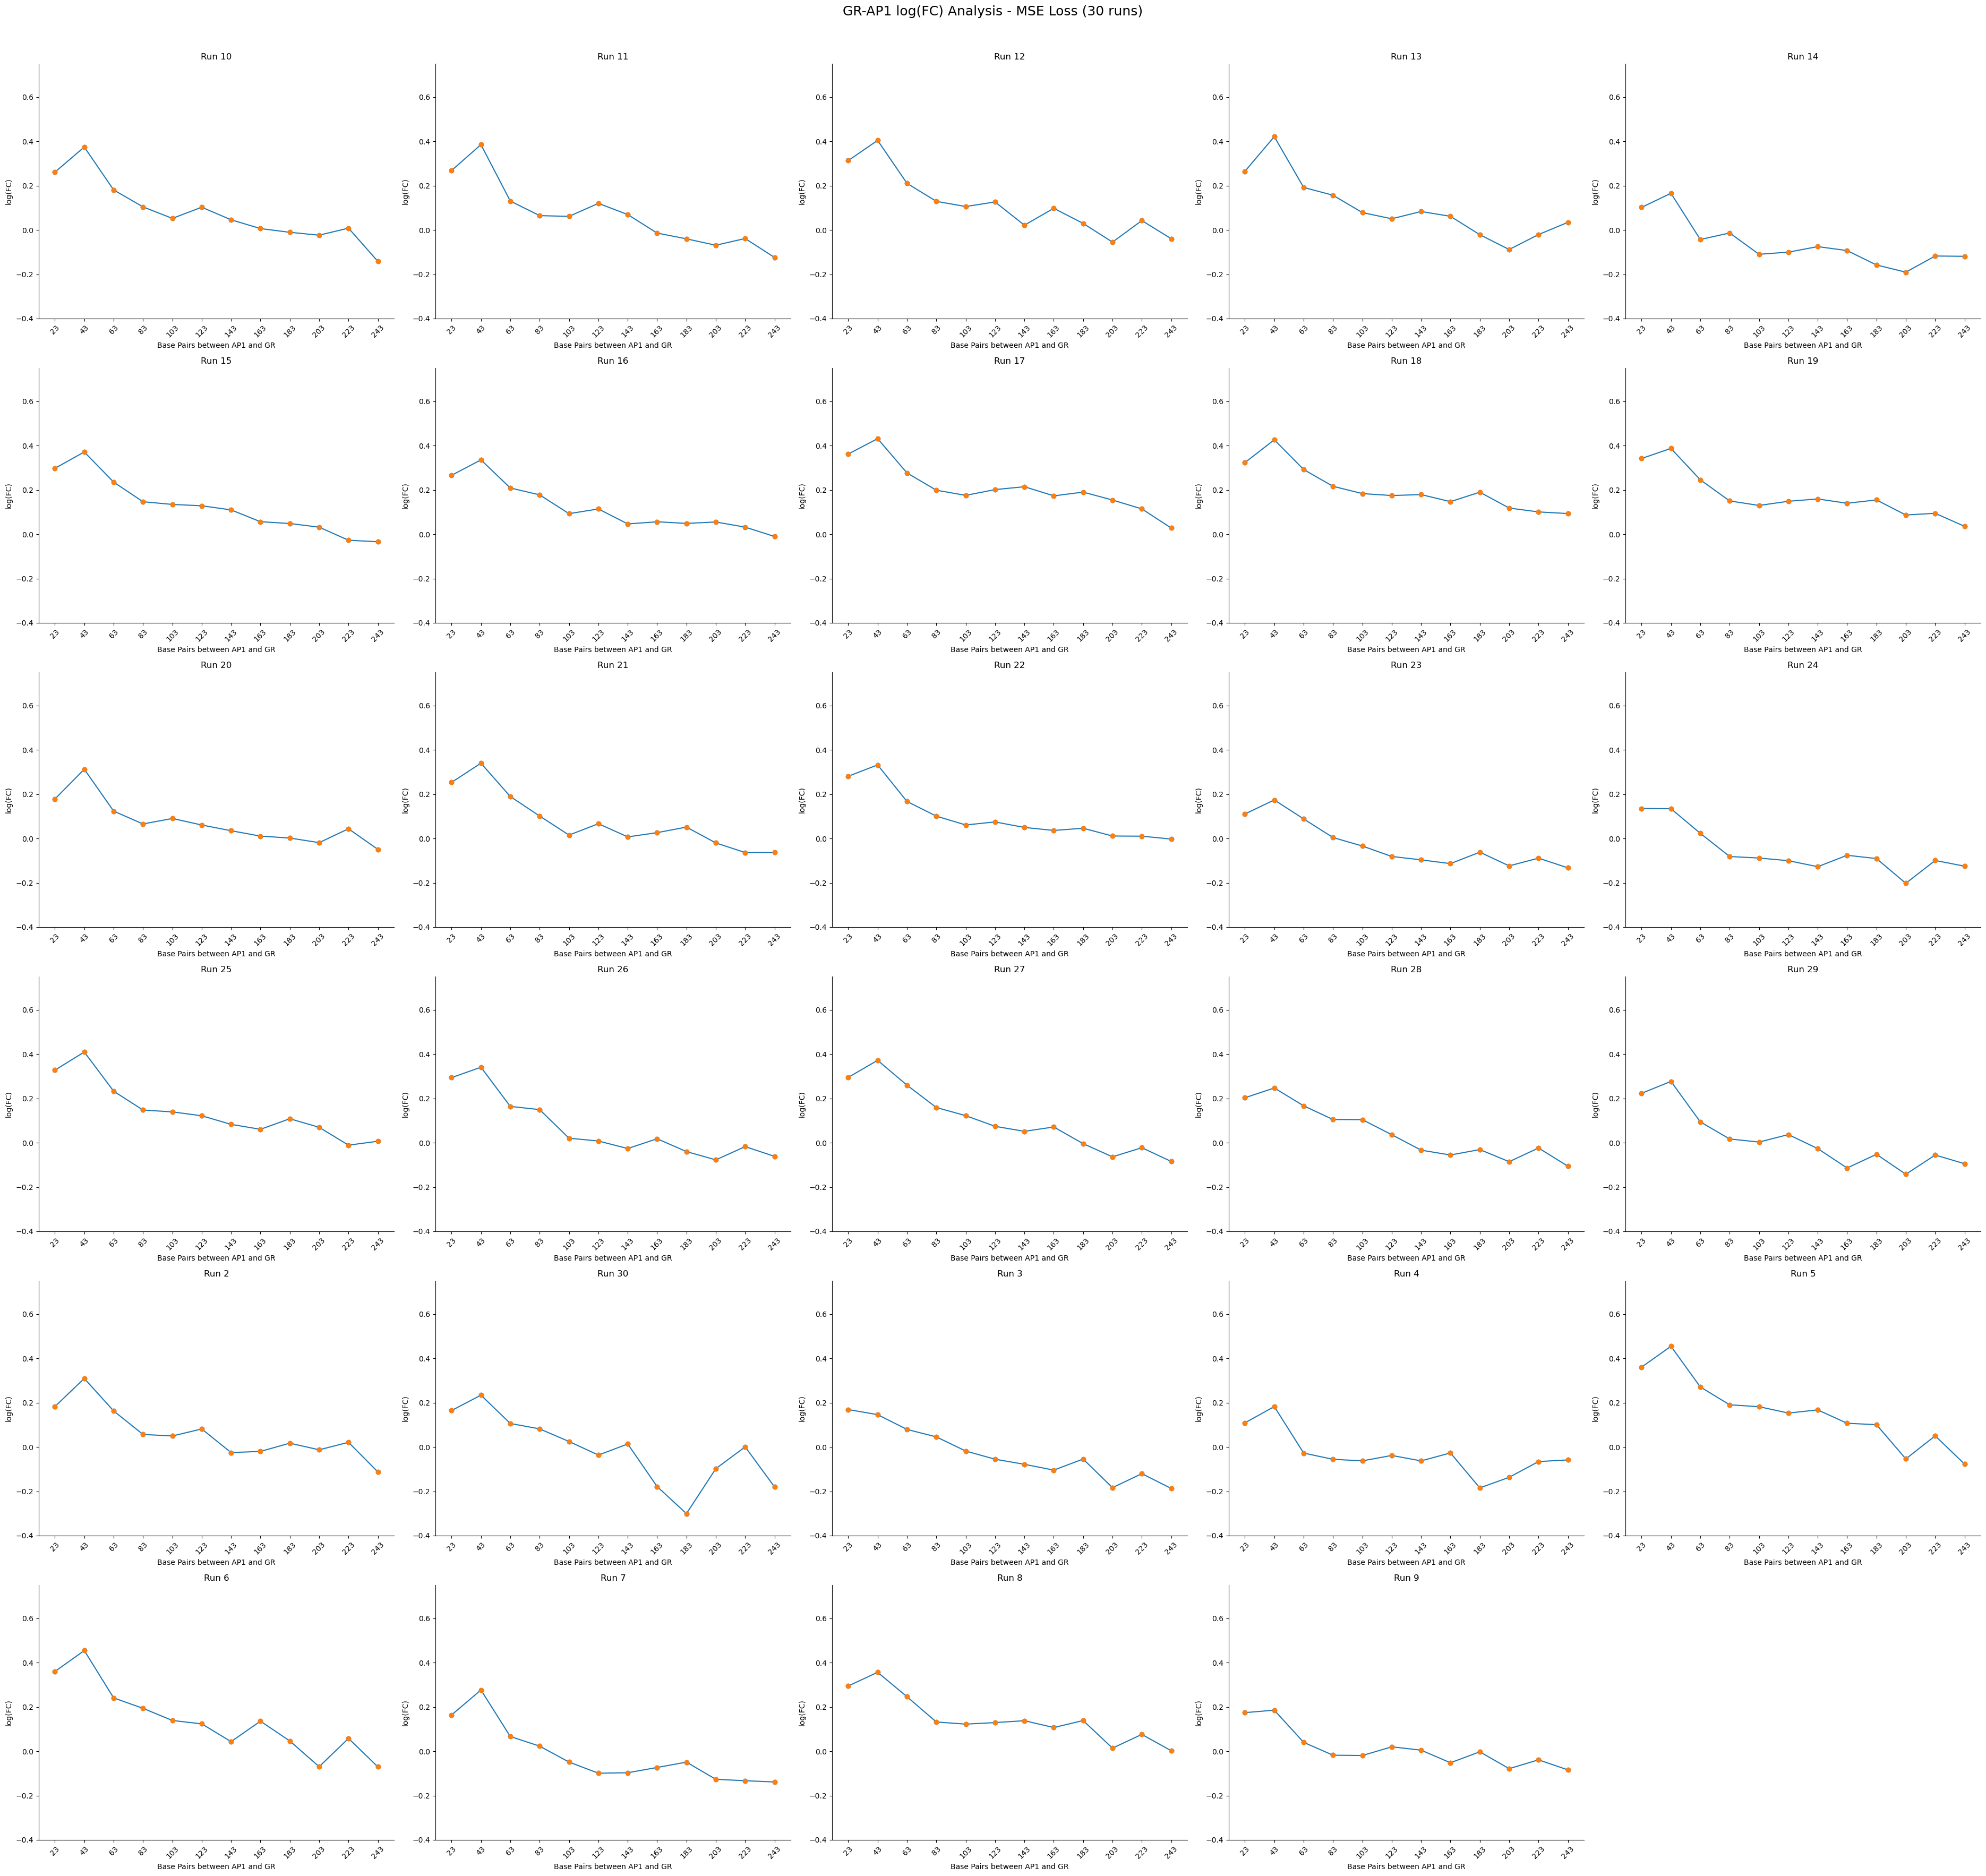

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

data_dir = "/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/"
file_pattern = os.path.join(data_dir, "DMSO_Dex4_MSELoss_*_original-seq-fc3.txt")
file_list = sorted(glob.glob(file_pattern))

fig, axs = plt.subplots(6, 5, figsize=(37.5, 36))
axs = axs.flatten() 

for idx, file_path in enumerate(file_list):
    df = pd.read_table(file_path, header=None)
    df.columns = ['location', 'DMSO.refScore', 'Dex.refScore', 'sequence']
    
    df['fc'] = df['Dex.refScore'] - df['DMSO.refScore']
    df['dist'] = np.tile(np.arange(23, 244, 20), 1)
    
    df = df.groupby('dist').agg(mean_fc=('fc', 'mean'), sd_fc=('fc', 'std')).reset_index()

    run_id = os.path.basename(file_path).split('_')[3]

    ax = axs[idx]
    ax.plot(df['dist'], df['mean_fc'], marker='o')
    ax.errorbar(df['dist'], df['mean_fc'], yerr=df['sd_fc'], fmt='o', capsize=5)
    ax.set_title(f"Run {run_id}")
    ax.set_xlabel("Base Pairs between AP1 and GR")
    ax.set_ylabel("log(FC)")
    ax.set_ylim(-0.4, 0.75)
    ax.set_xticks(np.arange(23, 244, 20))
    ax.tick_params(axis='x', rotation=45)
    ax.grid(False)

for i in range(len(file_list), len(axs)):
    fig.delaxes(axs[i])

fig.suptitle("GR-AP1 log(FC) Analysis - MSE Loss (30 runs)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
sns.despine()
plt.show()


In [4]:
%%bash
for i in {1..28};
do 
python /hpc/group/igvf/K562/leave-one-out/BlueSTARR/test-variants-fc.py \
/hpc/home/rv103/igvf/revathy/models/custom_loss/DMSO-200/DMSO-${i} \
/hpc/group/igvf/SHARED/trained-models/A549_Dex-4 \
/hpc/group/igvf/A549/GR-AP1/enhancer-seq/original-seq/original-seq.txt \
/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_Dex4_CustomLoss_${i}_original-seq-fc3.txt
done


2025-05-23 09:53:03.180122: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 09:53:03.180169: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 09:53:03.181634: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 09:53:03.188693: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 09:53:05.810776: W tensorflow/comp

Using TensorFlow backend


Traceback (most recent call last):
  File "/hpc/group/igvf/K562/leave-one-out/BlueSTARR/test-variants-fc.py", line 162, in <module>
    main(infile,modelFilestem1,modelFilestem2,output_dir)
  File "/hpc/group/igvf/K562/leave-one-out/BlueSTARR/test-variants-fc.py", line 59, in main
    with open(modelFilestem1+'.json', "r") as json_file:
FileNotFoundError: [Errno 2] No such file or directory: '/hpc/home/rv103/igvf/revathy/models/custom_loss/DMSO-200/DMSO-1.json'
2025-05-23 09:53:16.663204: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 09:53:16.663251: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 09:53:16.664607: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register c

Using TensorFlow backend


2025-05-23 09:53:34.639294: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 09:53:34.639335: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 09:53:34.640862: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 09:53:34.647697: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 09:53:36.744395: W tensorflow/comp

Using TensorFlow backend


2025-05-23 09:53:52.454991: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 09:53:52.455036: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 09:53:52.456386: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 09:53:52.463409: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 09:53:54.577220: W tensorflow/comp

Using TensorFlow backend


2025-05-23 09:54:09.910753: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 09:54:09.910793: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 09:54:09.912288: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 09:54:09.919265: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 09:54:12.378746: W tensorflow/comp

Using TensorFlow backend


2025-05-23 09:54:28.934676: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 09:54:28.935488: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 09:54:28.937355: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 09:54:28.945410: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 09:54:30.978349: W tensorflow/comp

Using TensorFlow backend


2025-05-23 09:54:46.022050: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 09:54:46.022096: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 09:54:46.023494: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 09:54:46.030125: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 09:54:48.212986: W tensorflow/comp

Using TensorFlow backend


2025-05-23 09:55:03.570028: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 09:55:03.570071: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 09:55:03.571420: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 09:55:03.578136: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 09:55:05.579895: W tensorflow/comp

Using TensorFlow backend


2025-05-23 09:55:21.138875: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 09:55:21.138921: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 09:55:21.140282: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 09:55:21.147246: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 09:55:23.747552: W tensorflow/comp

Using TensorFlow backend


2025-05-23 09:55:40.941070: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 09:55:40.941116: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 09:55:40.942462: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 09:55:40.949249: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 09:55:43.028442: W tensorflow/comp

Using TensorFlow backend


2025-05-23 09:55:58.261771: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 09:55:58.261817: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 09:55:58.263250: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 09:55:58.270314: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 09:56:00.547734: W tensorflow/comp

Using TensorFlow backend


2025-05-23 09:56:19.385305: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 09:56:19.385349: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 09:56:19.386704: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 09:56:19.393555: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 09:56:21.568615: W tensorflow/comp

Using TensorFlow backend


2025-05-23 09:56:37.314146: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 09:56:37.314189: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 09:56:37.315543: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 09:56:37.322130: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 09:56:39.951646: W tensorflow/comp

Using TensorFlow backend


2025-05-23 09:56:57.056057: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 09:56:57.056105: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 09:56:57.057445: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 09:56:57.064245: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 09:56:59.338042: W tensorflow/comp

Using TensorFlow backend


2025-05-23 09:57:14.742651: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 09:57:14.742990: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 09:57:14.744750: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 09:57:14.751656: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 09:57:16.928950: W tensorflow/comp

Using TensorFlow backend


2025-05-23 09:57:32.163908: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 09:57:32.163951: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 09:57:32.165327: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 09:57:32.172231: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 09:57:34.274524: W tensorflow/comp

Using TensorFlow backend


2025-05-23 09:57:49.609288: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 09:57:49.609333: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 09:57:49.610965: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 09:57:49.617985: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 09:57:52.001928: W tensorflow/comp

Using TensorFlow backend


2025-05-23 09:58:08.658989: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 09:58:08.659038: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 09:58:08.660599: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 09:58:08.667977: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 09:58:10.878304: W tensorflow/comp

Using TensorFlow backend


2025-05-23 09:58:25.957639: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 09:58:25.957686: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 09:58:25.959046: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 09:58:25.965980: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 09:58:28.191824: W tensorflow/comp

Using TensorFlow backend


2025-05-23 09:58:43.552078: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 09:58:43.552133: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 09:58:43.553477: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 09:58:43.560345: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 09:58:45.647435: W tensorflow/comp

Using TensorFlow backend


2025-05-23 09:59:01.026444: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 09:59:01.026487: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 09:59:01.027866: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 09:59:01.034795: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 09:59:03.438870: W tensorflow/comp

Using TensorFlow backend


2025-05-23 09:59:20.156154: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 09:59:20.156205: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 09:59:20.157579: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 09:59:20.164397: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 09:59:22.425975: W tensorflow/comp

Using TensorFlow backend


2025-05-23 09:59:37.654792: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 09:59:37.654835: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 09:59:37.656203: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 09:59:37.662946: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 09:59:39.897852: W tensorflow/comp

Using TensorFlow backend


2025-05-23 09:59:54.974868: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 09:59:54.974905: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 09:59:54.976278: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 09:59:54.982864: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 09:59:57.076112: W tensorflow/comp

Using TensorFlow backend


2025-05-23 10:00:12.419107: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 10:00:12.419154: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 10:00:12.420510: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 10:00:12.427291: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 10:00:14.995218: W tensorflow/comp

Using TensorFlow backend


2025-05-23 10:00:32.359004: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 10:00:32.359766: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 10:00:32.361196: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 10:00:32.367936: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 10:00:34.731180: W tensorflow/comp

Using TensorFlow backend


2025-05-23 10:00:50.485034: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 10:00:50.485080: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 10:00:50.486434: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 10:00:50.493385: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 10:00:52.752203: W tensorflow/comp

Using TensorFlow backend


2025-05-23 10:01:07.950983: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-23 10:01:07.951035: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-23 10:01:07.952394: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 10:01:08.018891: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 10:01:10.306705: W tensorflow/comp

Using TensorFlow backend


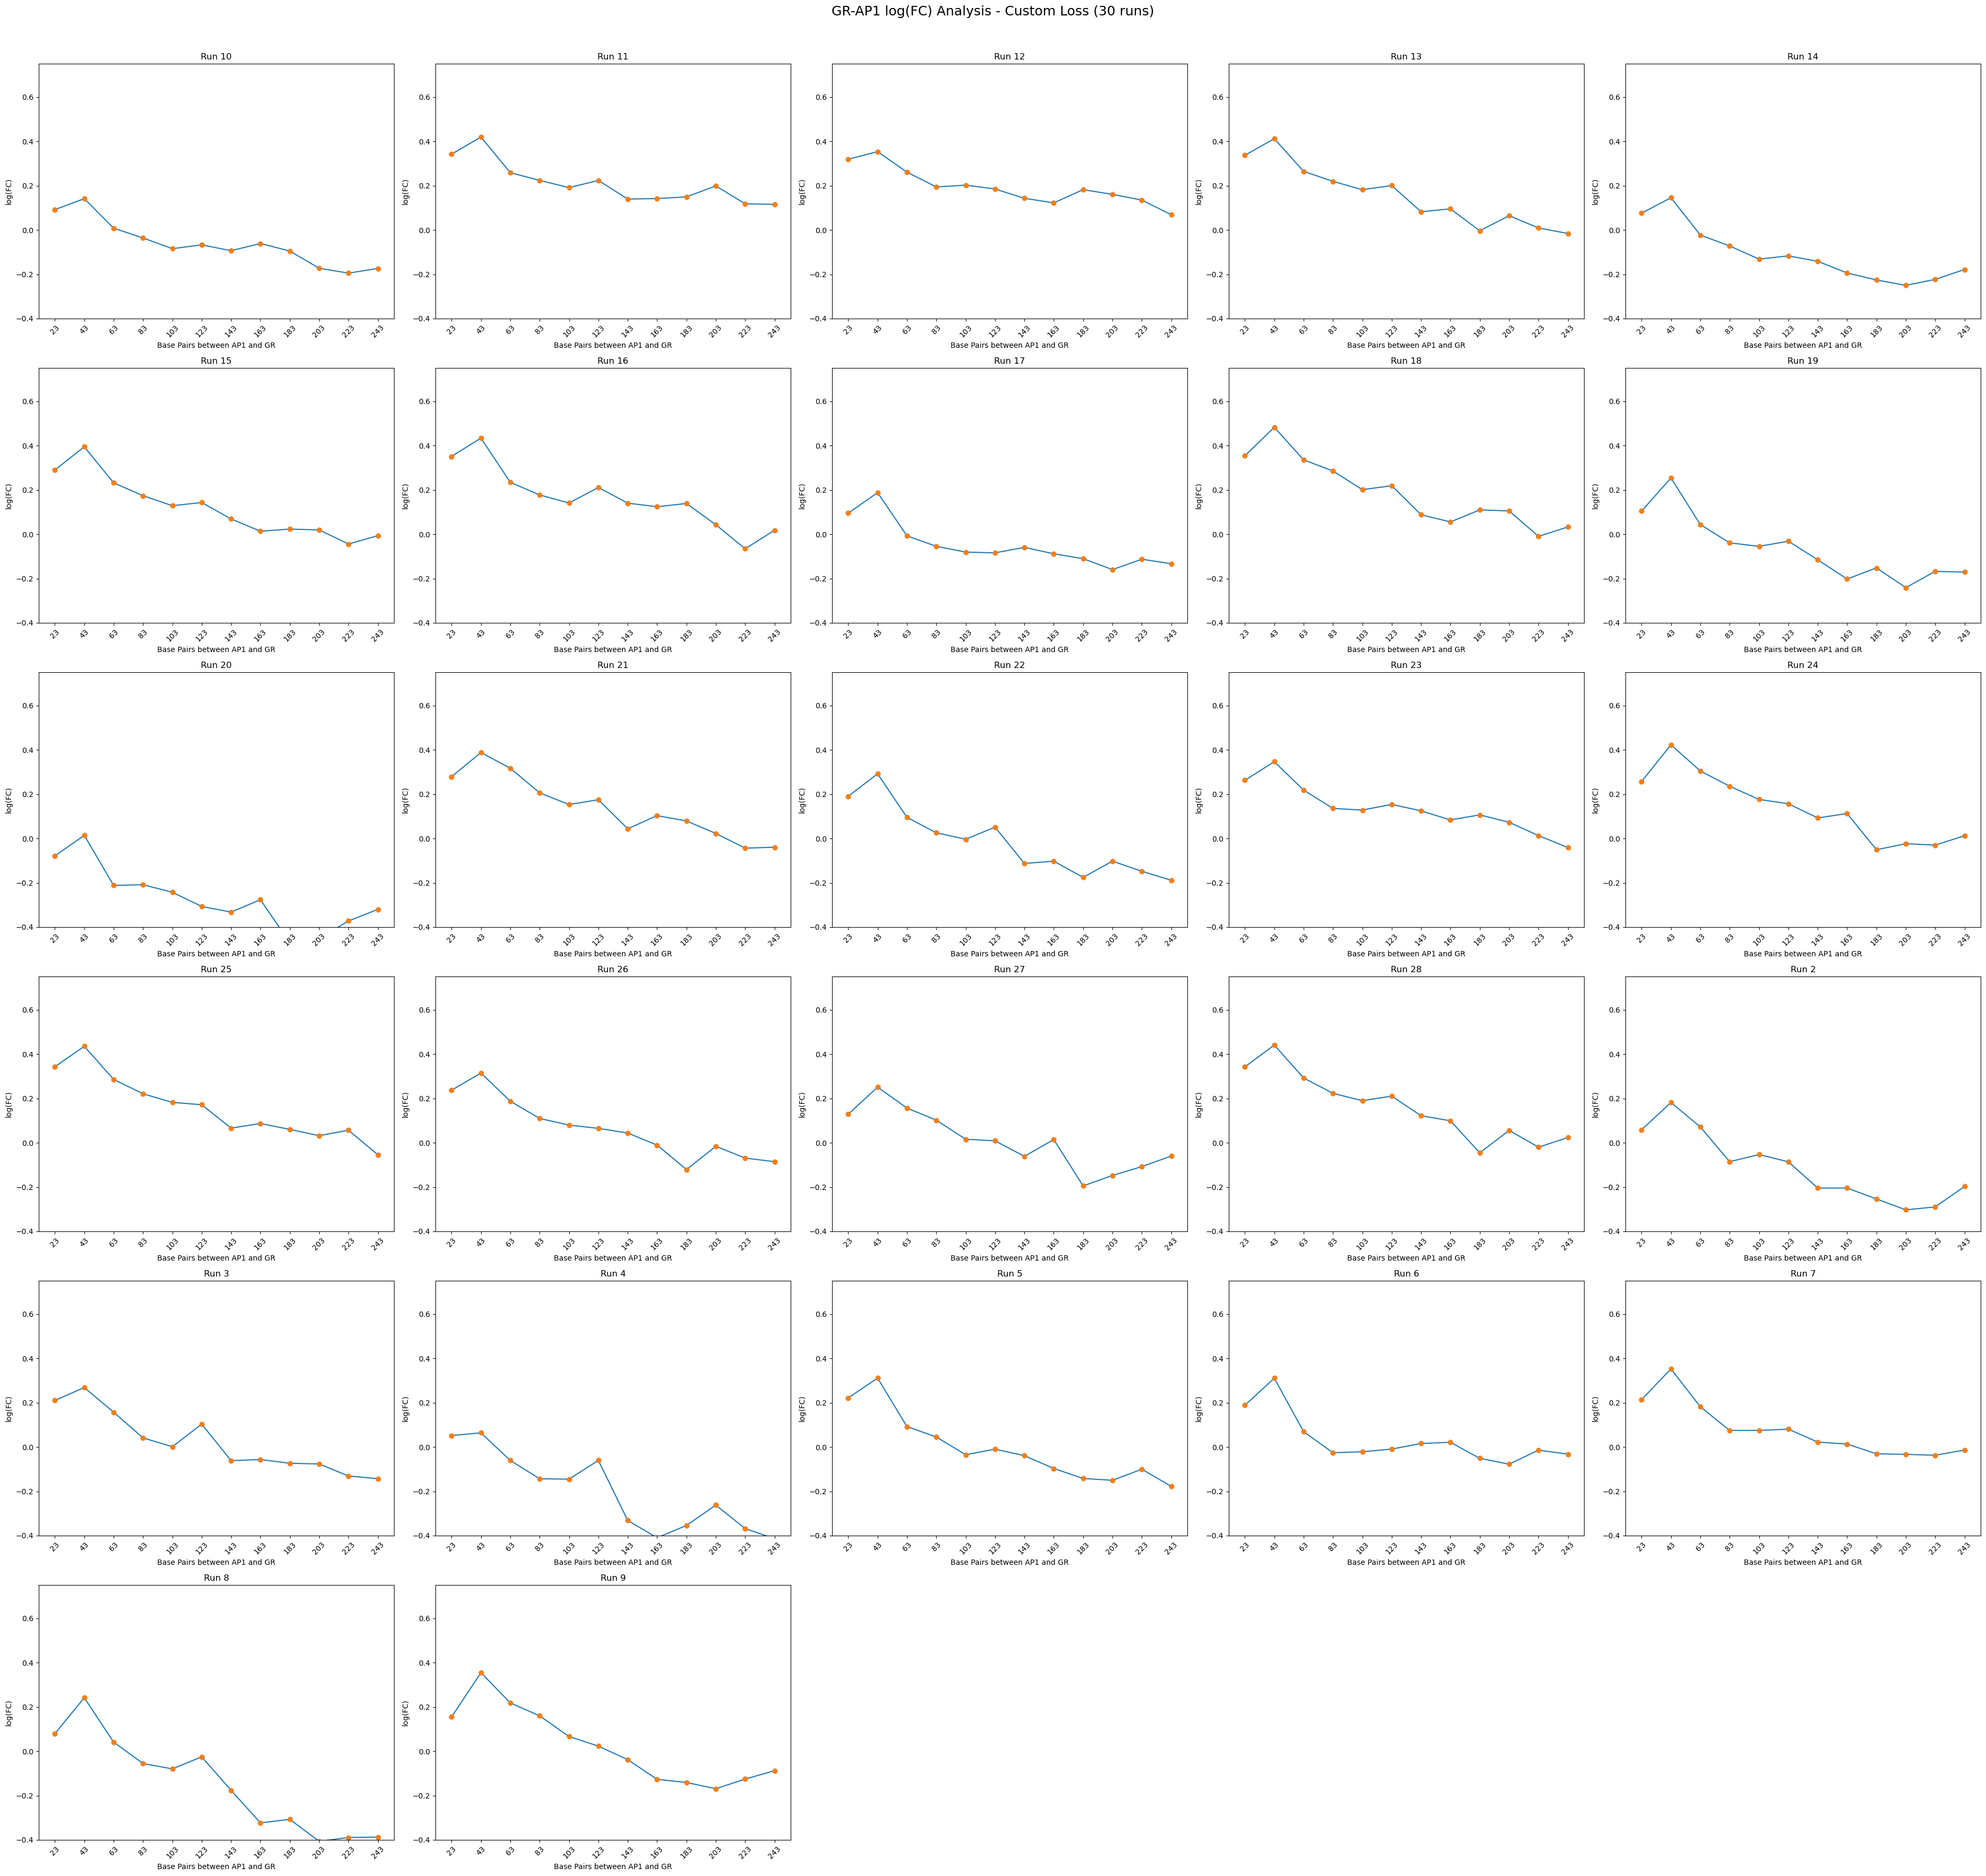

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

data_dir = "/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/"
file_pattern = os.path.join(data_dir, "DMSO_Dex4_CustomLoss_*_original-seq-fc3.txt")
file_list = sorted(glob.glob(file_pattern))

fig, axs = plt.subplots(6, 5, figsize=(37.5, 36))
axs = axs.flatten() 

for idx, file_path in enumerate(file_list):
    df = pd.read_table(file_path, header=None)
    df.columns = ['location', 'DMSO.refScore', 'Dex.refScore', 'sequence']
    
    df['fc'] = df['Dex.refScore'] - df['DMSO.refScore']
    df['dist'] = np.tile(np.arange(23, 244, 20), 1)
    
    df = df.groupby('dist').agg(mean_fc=('fc', 'mean'), sd_fc=('fc', 'std')).reset_index()

    run_id = os.path.basename(file_path).split('_')[3]

    ax = axs[idx]
    ax.plot(df['dist'], df['mean_fc'], marker='o')
    ax.errorbar(df['dist'], df['mean_fc'], yerr=df['sd_fc'], fmt='o', capsize=5)
    ax.set_title(f"Run {run_id}")
    ax.set_xlabel("Base Pairs between AP1 and GR")
    ax.set_ylabel("log(FC)")
    ax.set_ylim(-0.4, 0.75)
    ax.set_xticks(np.arange(23, 244, 20))
    ax.tick_params(axis='x', rotation=45)
    ax.grid(False)

for i in range(len(file_list), len(axs)):
    fig.delaxes(axs[i])

fig.suptitle("GR-AP1 log(FC) Analysis - Custom Loss (30 runs)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
# sns.despine()
plt.show()


## GR-AP1 analysis with MSE loss (30 models of Dex and DMSO)

- BlueSTARR architecture was updated to 6 CNN layers to increase the receptive field. 
- Out of the 30 models each of Dex and DMSO, Model 7 of Dex and Model 27 of DMSO had the least MSE values

In [2]:
%%bash
ls /hpc/home/rv103/igvf/revathy/models/mse_loss/DMSO-200/DMSO-*.h5 

/hpc/home/rv103/igvf/revathy/models/mse_loss/DMSO-200/DMSO-10.h5
/hpc/home/rv103/igvf/revathy/models/mse_loss/DMSO-200/DMSO-11.h5
/hpc/home/rv103/igvf/revathy/models/mse_loss/DMSO-200/DMSO-12.h5
/hpc/home/rv103/igvf/revathy/models/mse_loss/DMSO-200/DMSO-13.h5
/hpc/home/rv103/igvf/revathy/models/mse_loss/DMSO-200/DMSO-14.h5
/hpc/home/rv103/igvf/revathy/models/mse_loss/DMSO-200/DMSO-15.h5
/hpc/home/rv103/igvf/revathy/models/mse_loss/DMSO-200/DMSO-16.h5
/hpc/home/rv103/igvf/revathy/models/mse_loss/DMSO-200/DMSO-17.h5
/hpc/home/rv103/igvf/revathy/models/mse_loss/DMSO-200/DMSO-18.h5
/hpc/home/rv103/igvf/revathy/models/mse_loss/DMSO-200/DMSO-19.h5
/hpc/home/rv103/igvf/revathy/models/mse_loss/DMSO-200/DMSO-20.h5
/hpc/home/rv103/igvf/revathy/models/mse_loss/DMSO-200/DMSO-21.h5
/hpc/home/rv103/igvf/revathy/models/mse_loss/DMSO-200/DMSO-22.h5
/hpc/home/rv103/igvf/revathy/models/mse_loss/DMSO-200/DMSO-23.h5
/hpc/home/rv103/igvf/revathy/models/mse_loss/DMSO-200/DMSO-24.h5
/hpc/home/rv103/igvf/reva

In [3]:
%%bash
for i in {1..30};
do 
python /hpc/group/igvf/K562/leave-one-out/BlueSTARR/test-variants-fc.py \
/hpc/home/rv103/igvf/revathy/models/mse_loss/DMSO-200/DMSO-${i} \
/hpc/home/rv103/igvf/revathy/models/mse_loss/Dex-200/Dex-${i} \
/hpc/group/igvf/A549/GR-AP1/enhancer-seq/original-seq/original-seq.txt \
/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_DEX_MSELoss_${i}_original-seq-fc3.txt
done


2025-05-28 11:42:28.852419: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:42:28.852564: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:42:29.554424: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:42:31.098841: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:42:50.842936: W tensorflow/comp

Using TensorFlow backend


Traceback (most recent call last):
  File "/hpc/group/igvf/K562/leave-one-out/BlueSTARR/test-variants-fc.py", line 162, in <module>
    main(infile,modelFilestem1,modelFilestem2,output_dir)
  File "/hpc/group/igvf/K562/leave-one-out/BlueSTARR/test-variants-fc.py", line 59, in main
    with open(modelFilestem1+'.json', "r") as json_file:
FileNotFoundError: [Errno 2] No such file or directory: '/hpc/home/rv103/igvf/revathy/models/mse_loss/DMSO-200/DMSO-1.json'
2025-05-28 11:43:40.877320: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:43:40.877424: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:43:40.878631: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBL

Using TensorFlow backend


2025-05-28 11:44:05.166956: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:44:05.167288: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:44:05.168901: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:44:05.176017: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:44:08.320121: W tensorflow/comp

Using TensorFlow backend


2025-05-28 11:44:28.798708: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:44:28.799033: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:44:28.800559: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:44:28.809359: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:44:31.671805: W tensorflow/comp

Using TensorFlow backend


2025-05-28 11:44:51.397713: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:44:51.397767: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:44:51.399003: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:44:51.405487: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:44:54.308522: W tensorflow/comp

Using TensorFlow backend


2025-05-28 11:45:13.797140: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:45:13.797198: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:45:13.798402: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:45:13.804832: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:45:16.742353: W tensorflow/comp

Using TensorFlow backend


2025-05-28 11:45:36.422706: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:45:36.422766: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:45:36.423978: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:45:36.430866: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:45:39.056976: W tensorflow/comp

Using TensorFlow backend


2025-05-28 11:45:57.770534: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:45:57.770958: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:45:57.772197: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:45:57.778762: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:46:00.700694: W tensorflow/comp

Using TensorFlow backend


2025-05-28 11:46:20.510725: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:46:20.510764: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:46:20.512157: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:46:20.519363: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:46:23.494092: W tensorflow/comp

Using TensorFlow backend


2025-05-28 11:46:44.695424: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:46:44.696274: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:46:44.697993: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:46:44.705185: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:46:47.962292: W tensorflow/comp

Using TensorFlow backend


2025-05-28 11:47:08.809685: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:47:08.809739: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:47:08.811105: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:47:08.817884: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:47:11.821112: W tensorflow/comp

Using TensorFlow backend


2025-05-28 11:47:32.903429: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:47:32.903476: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:47:32.904700: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:47:32.916990: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:47:36.125248: W tensorflow/comp

Using TensorFlow backend


2025-05-28 11:47:55.643041: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:47:55.643117: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:47:55.644320: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:47:55.655744: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:47:58.057124: W tensorflow/comp

Using TensorFlow backend


2025-05-28 11:48:15.873211: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:48:15.873265: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:48:15.874520: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:48:15.889961: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:48:18.487640: W tensorflow/comp

Using TensorFlow backend


2025-05-28 11:48:37.537562: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:48:37.537613: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:48:37.538837: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:48:37.545521: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:48:40.373243: W tensorflow/comp

Using TensorFlow backend


2025-05-28 11:49:00.109106: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:49:00.109158: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:49:00.110389: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:49:00.125414: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:49:03.090571: W tensorflow/comp

Using TensorFlow backend


2025-05-28 11:49:21.259360: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:49:21.259447: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:49:21.260653: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:49:21.267087: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:49:24.121521: W tensorflow/comp

Using TensorFlow backend


2025-05-28 11:49:43.841960: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:49:43.842013: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:49:43.843234: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:49:43.852950: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:49:46.687621: W tensorflow/comp

Using TensorFlow backend


2025-05-28 11:50:06.307406: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:50:06.307454: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:50:06.308700: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:50:06.315175: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:50:08.837344: W tensorflow/comp

Using TensorFlow backend


2025-05-28 11:50:26.745734: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:50:26.745786: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:50:26.747064: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:50:26.785071: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:50:29.827799: W tensorflow/comp

Using TensorFlow backend


2025-05-28 11:50:49.152687: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:50:49.153558: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:50:49.155333: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:50:49.163375: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:50:51.963652: W tensorflow/comp

Using TensorFlow backend


2025-05-28 11:51:11.786186: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:51:11.787041: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:51:11.788447: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:51:11.795860: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:51:14.318786: W tensorflow/comp

Using TensorFlow backend


2025-05-28 11:51:32.298621: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:51:32.298675: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:51:32.299877: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:51:32.307279: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:51:34.967339: W tensorflow/comp

Using TensorFlow backend


2025-05-28 11:51:53.324917: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:51:53.325869: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:51:53.327198: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:51:53.340803: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:51:56.060182: W tensorflow/comp

Using TensorFlow backend


2025-05-28 11:52:16.406684: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:52:16.407000: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:52:16.408261: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:52:16.417185: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:52:19.159638: W tensorflow/comp

Using TensorFlow backend


2025-05-28 11:52:37.749428: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:52:37.749499: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:52:37.751079: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:52:37.759522: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:52:40.675139: W tensorflow/comp

Using TensorFlow backend


2025-05-28 11:52:59.534940: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:52:59.534989: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:52:59.536219: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:52:59.542696: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:53:02.778502: W tensorflow/comp

Using TensorFlow backend


2025-05-28 11:53:24.277137: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:53:24.277202: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:53:24.278485: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:53:24.285539: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:53:26.823912: W tensorflow/comp

Using TensorFlow backend


2025-05-28 11:53:44.990181: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:53:44.990505: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:53:44.992107: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:53:44.999034: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:53:47.616117: W tensorflow/comp

Using TensorFlow backend


2025-05-28 11:54:05.187929: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 11:54:05.188861: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 11:54:05.190157: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 11:54:05.200362: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 11:54:07.892362: W tensorflow/comp

Using TensorFlow backend


In [4]:
!ls /hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_DEX_MSELoss_*_original-seq-fc3.txt

/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_DEX_MSELoss_10_original-seq-fc3.txt
/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_DEX_MSELoss_11_original-seq-fc3.txt
/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_DEX_MSELoss_12_original-seq-fc3.txt
/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_DEX_MSELoss_13_original-seq-fc3.txt
/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_DEX_MSELoss_14_original-seq-fc3.txt
/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_DEX_MSELoss_15_original-seq-fc3.txt
/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_DEX_MSELoss_16_original-seq-fc3.txt
/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_DEX_MSELoss_17_original-seq-fc3.txt
/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_DEX_MSELoss_18_original-seq-fc3.txt
/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_DEX_MSELoss_19_original-seq-fc3.txt
/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_DEX_MSELoss_20_original-seq-fc3.txt
/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_DEX_MSELoss_21_original-seq-fc3.txt
/hpc

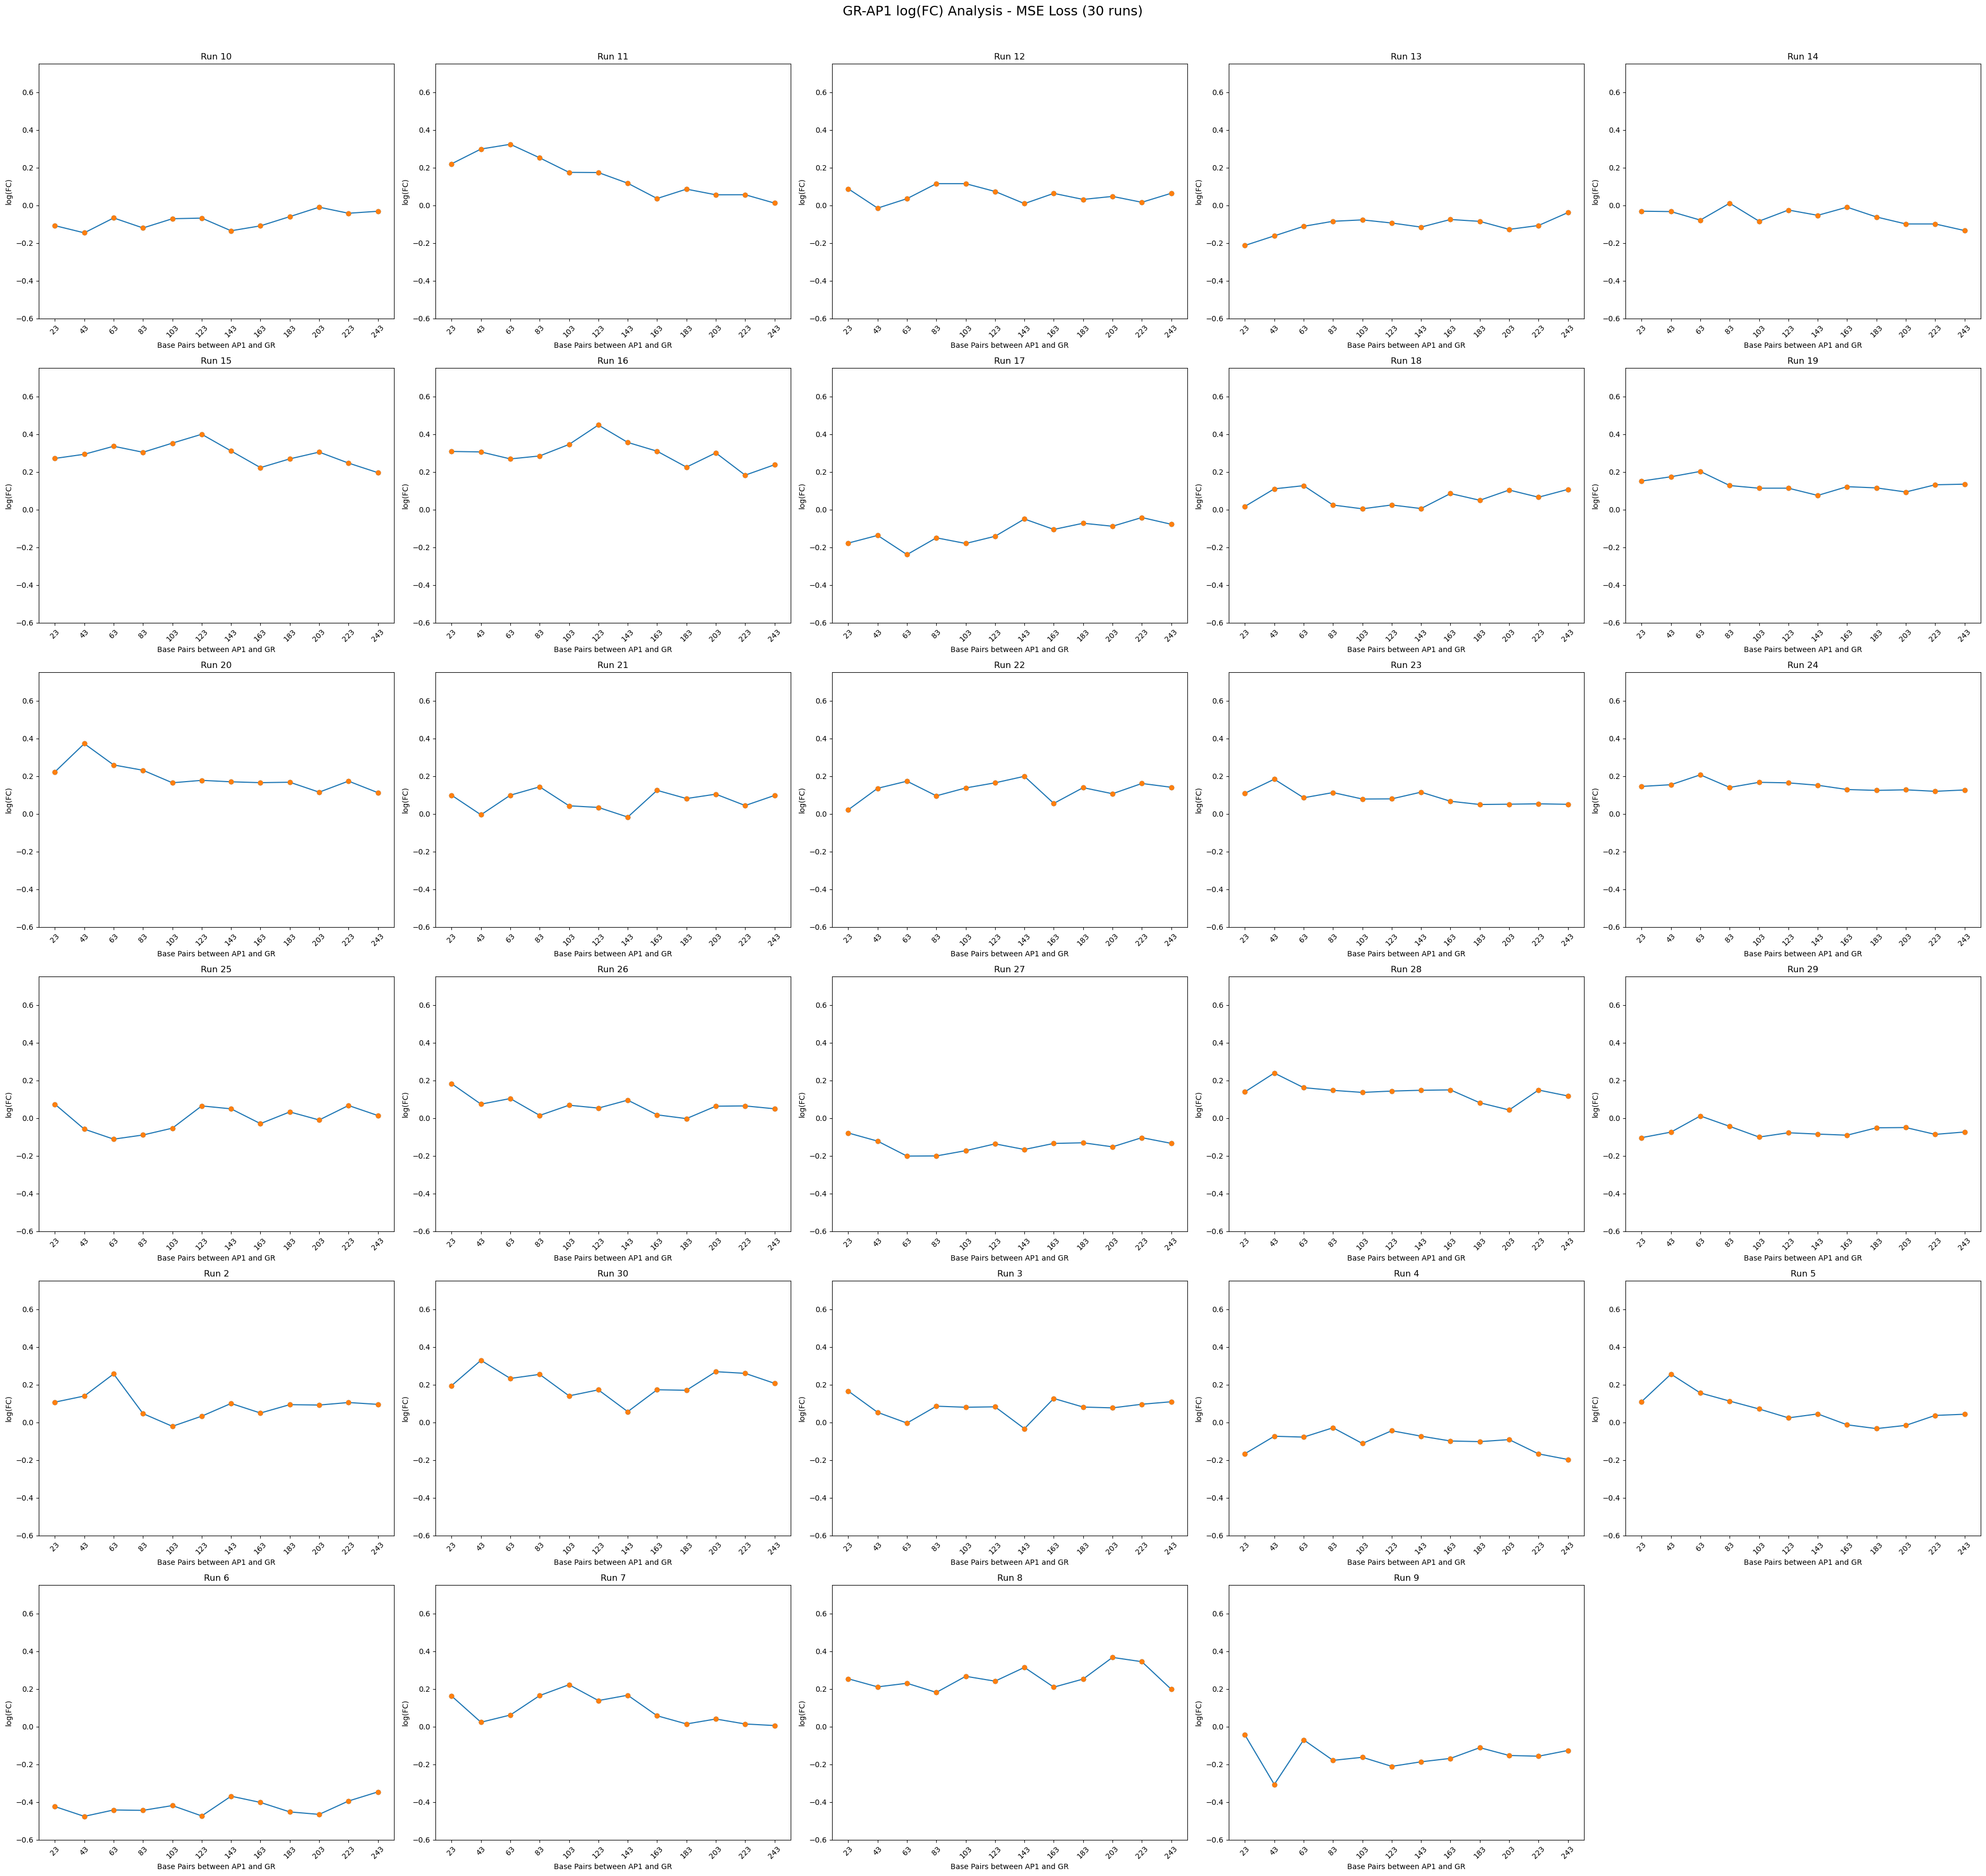

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

data_dir = "/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/"
file_pattern = os.path.join(data_dir, "DMSO_DEX_MSELoss_*_original-seq-fc3.txt")
file_list = sorted(glob.glob(file_pattern))

fig, axs = plt.subplots(6, 5, figsize=(37.5, 36))
axs = axs.flatten() 

for idx, file_path in enumerate(file_list):
    df = pd.read_table(file_path, header=None)
    df.columns = ['location', 'DMSO.refScore', 'Dex.refScore', 'sequence']
    
    df['fc'] = df['Dex.refScore'] - df['DMSO.refScore']
    df['dist'] = np.tile(np.arange(23, 244, 20), 1)
    
    df = df.groupby('dist').agg(mean_fc=('fc', 'mean'), sd_fc=('fc', 'std')).reset_index()

    run_id = os.path.basename(file_path).split('_')[3]

    ax = axs[idx]
    ax.plot(df['dist'], df['mean_fc'], marker='o')
    ax.errorbar(df['dist'], df['mean_fc'], yerr=df['sd_fc'], fmt='o', capsize=5)
    ax.set_title(f"Run {run_id}")
    ax.set_xlabel("Base Pairs between AP1 and GR")
    ax.set_ylabel("log(FC)")
    ax.set_ylim(-0.6, 0.75)
    ax.set_xticks(np.arange(23, 244, 20))
    ax.tick_params(axis='x', rotation=45)
    ax.grid(False)

for i in range(len(file_list), len(axs)):
    fig.delaxes(axs[i])

fig.suptitle("GR-AP1 log(FC) Analysis - MSE Loss (30 runs)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
# sns.despine()
plt.show()


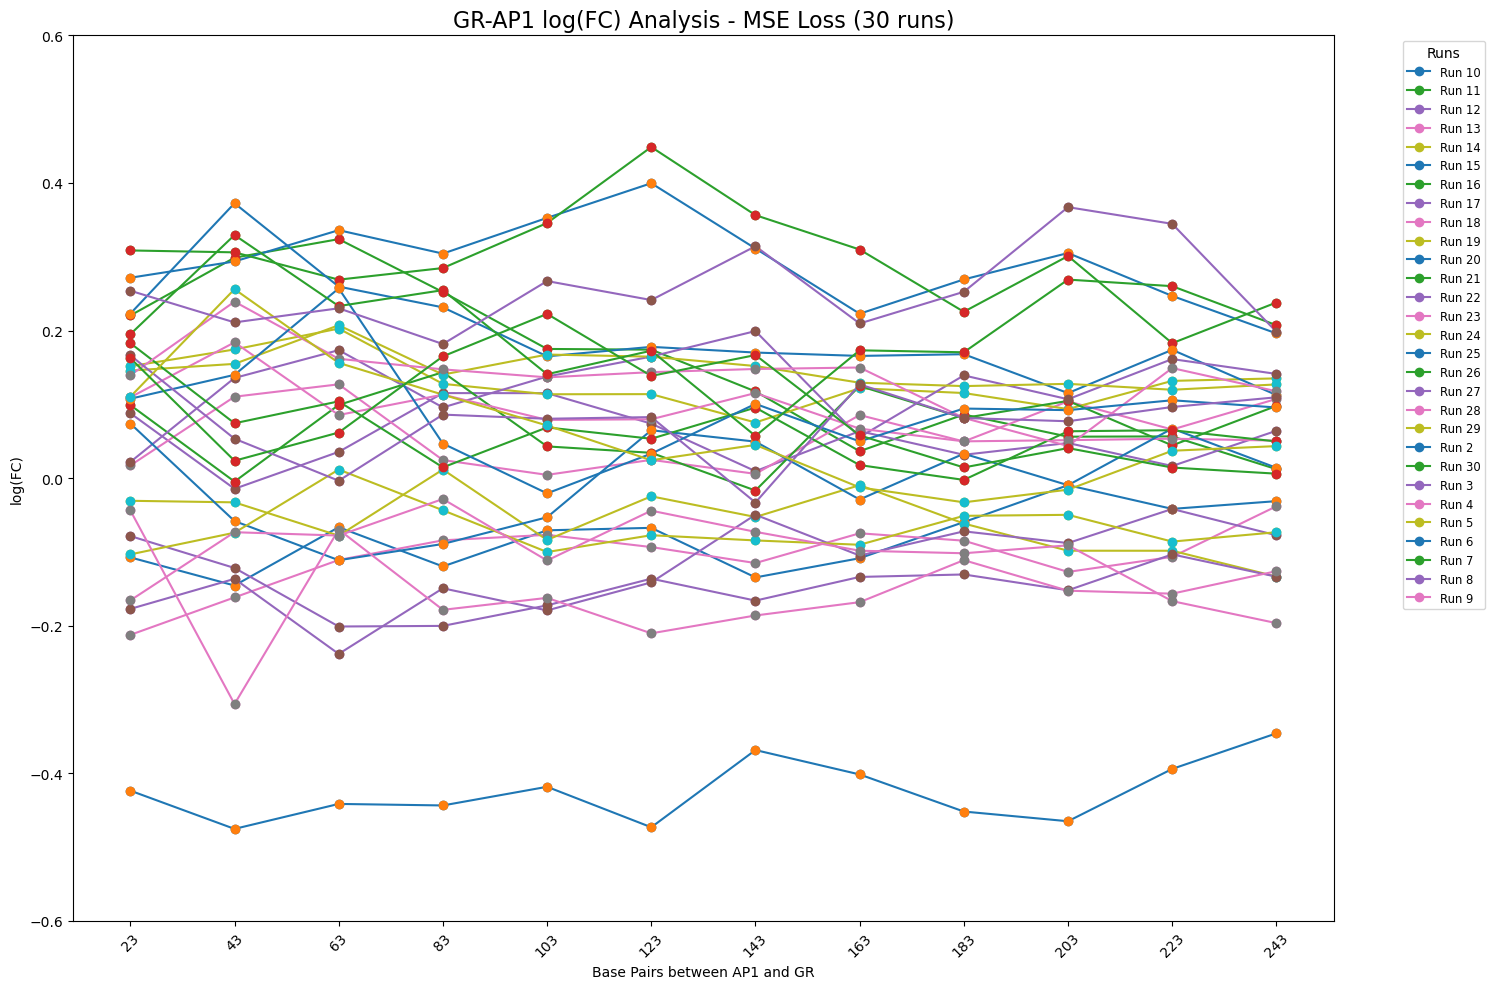

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

data_dir = "/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/"
file_pattern = os.path.join(data_dir, "DMSO_DEX_MSELoss_*_original-seq-fc3.txt")
file_list = sorted(glob.glob(file_pattern))

plt.figure(figsize=(15, 10))
for file_path in file_list:
    df = pd.read_table(file_path, header=None)
    df.columns = ['location', 'DMSO.refScore', 'Dex.refScore', 'sequence']
    
    df['fc'] = df['Dex.refScore'] - df['DMSO.refScore']
    df['dist'] = np.tile(np.arange(23, 244, 20), 1)
    
    df = df.groupby('dist').agg(mean_fc=('fc', 'mean'), sd_fc=('fc', 'std')).reset_index()

    run_id = os.path.basename(file_path).split('_')[3]

    plt.plot(df['dist'], df['mean_fc'], marker='o', label=f"Run {run_id}")
    plt.errorbar(df['dist'], df['mean_fc'], yerr=df['sd_fc'], fmt='o', capsize=5)

plt.title("GR-AP1 log(FC) Analysis - MSE Loss (30 runs)", fontsize=16)
plt.xlabel("Base Pairs between AP1 and GR")
plt.ylabel("log(FC)")
plt.ylim(-0.6, 0.6)
plt.xticks(np.arange(23, 244, 20), rotation=45)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=1, title="Runs")
plt.tight_layout()
plt.show()


In [11]:
%%bash
python /hpc/group/igvf/K562/leave-one-out/BlueSTARR/test-variants-fc.py \
/hpc/home/rv103/igvf/revathy/models/mse_loss/DMSO-200/DMSO-27 \
/hpc/home/rv103/igvf/revathy/models/mse_loss/Dex-200/Dex-7 \
/hpc/group/igvf/A549/GR-AP1/enhancer-seq/original-seq/original-seq.txt \
/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_27_DEX_7_MSELoss_original-seq-fc3.txt


2025-05-28 12:04:55.815604: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 12:04:55.815667: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 12:04:55.817654: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 12:04:55.826719: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 12:04:59.427979: W tensorflow/comp

Using TensorFlow backend


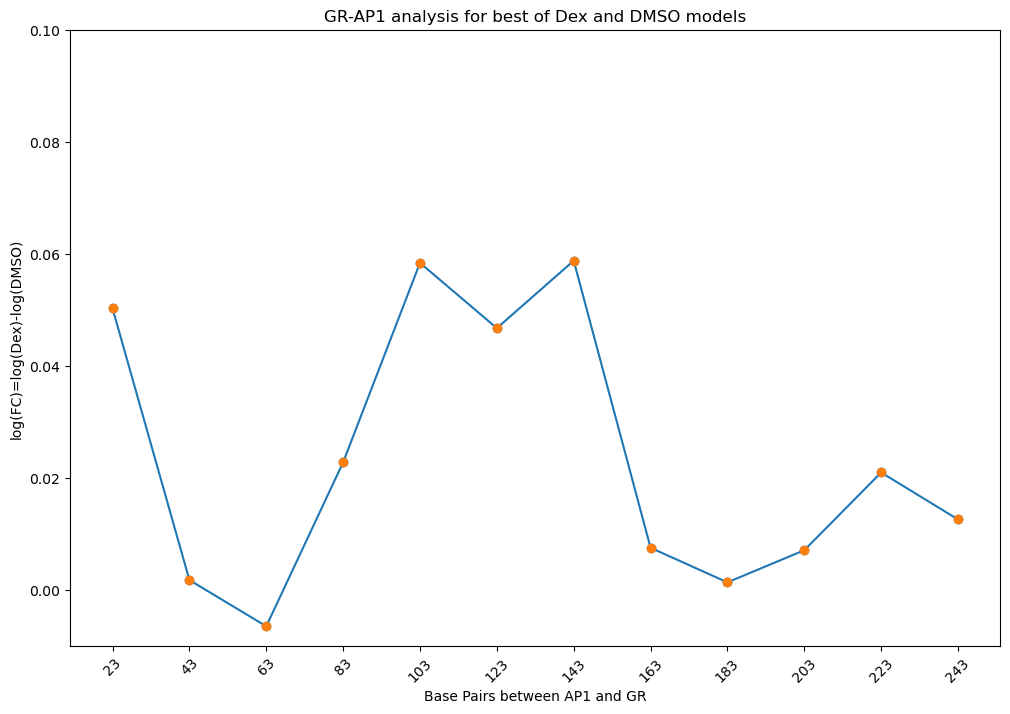

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_table('/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_27_DEX_7_MSELoss_original-seq-fc3.txt',header = None)
df.columns = ['location', 'DMSO.refScore', 'Dex.refScore','sequence'] # log scale
df['fc'] = (df['Dex.refScore']-df['DMSO.refScore'])
# df['fc'] = np.exp(df['Dex.refScore'])/np.exp(df['DMSO.refScore'])

df['dist'] = np.tile(np.arange(23, 244, 20), 1)
df = df.groupby('dist').agg(mean_fc=('fc', 'mean'), sd_fc=('fc', 'std')).reset_index()
x = range(23, 244, 20)
plt.figure(figsize=(12, 8))
plt.plot(df['dist'], df['mean_fc'], marker='o')
plt.title("GR-AP1 analysis for best of Dex and DMSO models")
plt.xlabel("Base Pairs between AP1 and GR")
plt.ylabel("log(FC)=log(Dex)-log(DMSO)")
plt.ylim(-0.01,0.1)
plt.yscale('linear')
plt.errorbar(df['dist'], df['mean_fc'], yerr=df['sd_fc'], fmt='o', capsize=5)
plt.xticks(np.arange(23, 244, 20), rotation=45)
plt.show()

In [ ]:
%%bash
for i in {1..30};
do 
python /hpc/group/igvf/K562/leave-one-out/BlueSTARR/test-variants-fc.py \
/hpc/home/rv103/igvf/revathy/models/mse_loss/DMSO-200/DMSO-${i} \
/hpc/home/rv103/igvf/revathy/models/mse_loss/Dex-200/Dex-7 \
/hpc/group/igvf/A549/GR-AP1/enhancer-seq/original-seq/original-seq.txt \
/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_${i}_DEX_7_MSELoss_original-seq-fc3.txt
done

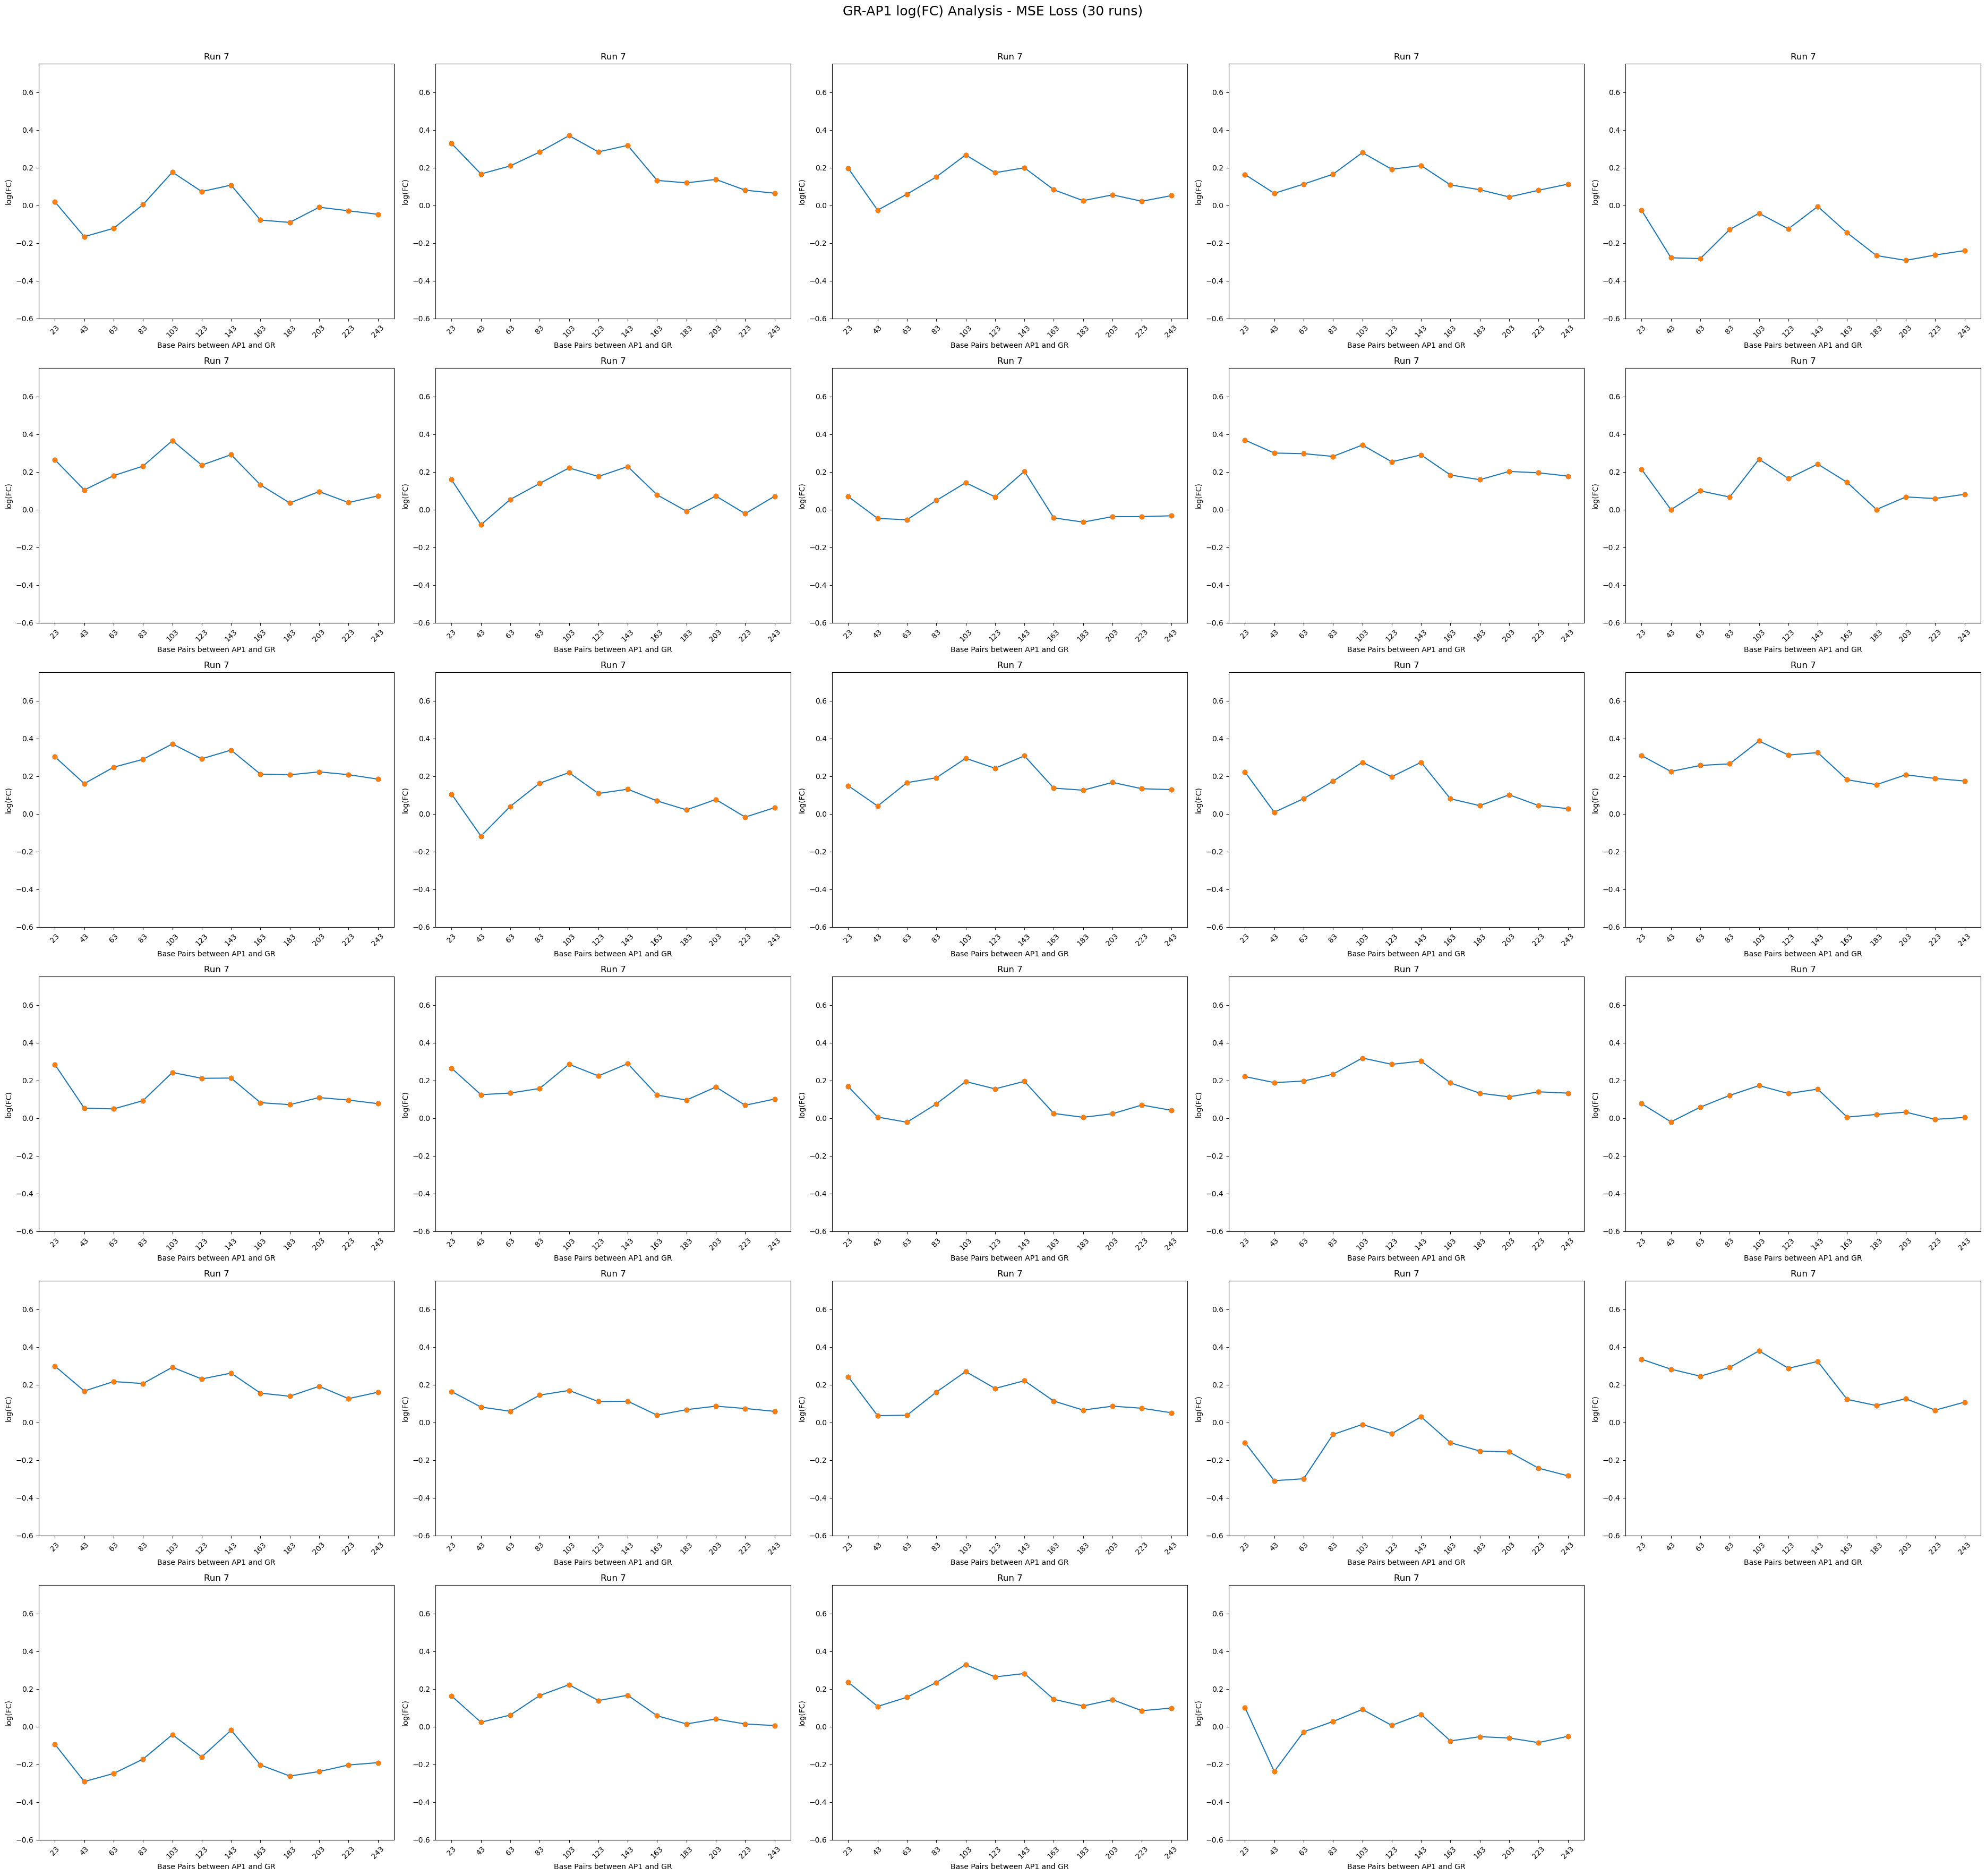

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

data_dir = "/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/"
file_pattern = os.path.join(data_dir, "DMSO_*_DEX_7_MSELoss_original-seq-fc3.txt")
file_list = sorted(glob.glob(file_pattern))

fig, axs = plt.subplots(6, 5, figsize=(37.5, 36))
axs = axs.flatten()  

for idx, file_path in enumerate(file_list):
    df = pd.read_table(file_path, header=None)
    df.columns = ['location', 'DMSO.refScore', 'Dex.refScore', 'sequence']
    
    df['fc'] = df['Dex.refScore'] - df['DMSO.refScore']
    df['dist'] = np.tile(np.arange(23, 244, 20), 1)
    
    df = df.groupby('dist').agg(mean_fc=('fc', 'mean'), sd_fc=('fc', 'std')).reset_index()

    run_id = os.path.basename(file_path).split('_')[3]

    ax = axs[idx]
    ax.plot(df['dist'], df['mean_fc'], marker='o')
    ax.errorbar(df['dist'], df['mean_fc'], yerr=df['sd_fc'], fmt='o', capsize=5)
    ax.set_title(f"Run {run_id}")
    ax.set_xlabel("Base Pairs between AP1 and GR")
    ax.set_ylabel("log(FC)")
    ax.set_ylim(-0.6, 0.75)
    ax.set_xticks(np.arange(23, 244, 20))
    ax.tick_params(axis='x', rotation=45)
    ax.grid(False)

for i in range(len(file_list), len(axs)):
    fig.delaxes(axs[i])

fig.suptitle("GR-AP1 log(FC) Analysis - MSE Loss (30 runs)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
# sns.despine()
plt.show()


In [18]:
%%bash
for i in {1..30};
do 
python /hpc/group/igvf/K562/leave-one-out/BlueSTARR/test-variants-fc.py \
/hpc/home/rv103/igvf/revathy/models/mse_loss/DMSO-200/DMSO-27 \
/hpc/home/rv103/igvf/revathy/models/mse_loss/Dex-200/Dex-${i} \
/hpc/group/igvf/A549/GR-AP1/enhancer-seq/original-seq/original-seq.txt \
/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_27_DEX_${i}_MSELoss_original-seq-fc3.txt
done

2025-05-28 15:36:29.450140: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:36:29.450195: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:36:29.451433: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:36:29.459176: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:36:32.367140: W tensorflow/comp

Using TensorFlow backend


Traceback (most recent call last):
  File "/hpc/group/igvf/K562/leave-one-out/BlueSTARR/test-variants-fc.py", line 162, in <module>
    main(infile,modelFilestem1,modelFilestem2,output_dir)
  File "/hpc/group/igvf/K562/leave-one-out/BlueSTARR/test-variants-fc.py", line 67, in main
    with open(modelFilestem2+'.json', "r") as json_file:
FileNotFoundError: [Errno 2] No such file or directory: '/hpc/home/rv103/igvf/revathy/models/mse_loss/Dex-200/Dex-1.json'
2025-05-28 15:36:45.201127: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:36:45.201442: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:36:45.202692: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS

Using TensorFlow backend


2025-05-28 15:37:04.458572: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:37:04.458620: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:37:04.459818: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:37:04.466176: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:37:06.833702: W tensorflow/comp

Using TensorFlow backend


2025-05-28 15:37:24.255955: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:37:24.255999: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:37:24.257170: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:37:24.263703: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:37:26.719360: W tensorflow/comp

Using TensorFlow backend


2025-05-28 15:37:45.257476: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:37:45.257526: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:37:45.258868: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:37:45.265621: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:37:48.187357: W tensorflow/comp

Using TensorFlow backend


2025-05-28 15:38:08.781632: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:38:08.781684: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:38:08.782912: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:38:08.790328: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:38:11.397134: W tensorflow/comp

Using TensorFlow backend


2025-05-28 15:38:28.745614: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:38:28.745919: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:38:28.747382: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:38:28.753747: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:38:31.207909: W tensorflow/comp

Using TensorFlow backend


2025-05-28 15:38:48.019189: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:38:48.019286: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:38:48.020570: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:38:48.027163: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:38:51.074899: W tensorflow/comp

Using TensorFlow backend


2025-05-28 15:39:10.407868: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:39:10.407918: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:39:10.409153: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:39:10.415462: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:39:12.974134: W tensorflow/comp

Using TensorFlow backend


2025-05-28 15:39:30.560644: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:39:30.561492: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:39:30.562705: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:39:30.569075: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:39:33.000406: W tensorflow/comp

Using TensorFlow backend


2025-05-28 15:39:50.354772: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:39:50.354826: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:39:50.356082: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:39:50.362520: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:39:53.341931: W tensorflow/comp

Using TensorFlow backend


2025-05-28 15:40:12.699590: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:40:12.699896: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:40:12.701211: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:40:12.707620: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:40:15.304990: W tensorflow/comp

Using TensorFlow backend


2025-05-28 15:40:33.151734: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:40:33.151783: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:40:33.153009: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:40:33.159569: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:40:35.455664: W tensorflow/comp

Using TensorFlow backend


2025-05-28 15:40:53.153333: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:40:53.153380: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:40:53.154659: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:40:53.161041: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:40:55.954770: W tensorflow/comp

Using TensorFlow backend


2025-05-28 15:41:14.659414: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:41:14.659703: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:41:14.660957: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:41:14.667334: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:41:17.055452: W tensorflow/comp

Using TensorFlow backend


2025-05-28 15:41:34.352526: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:41:34.352565: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:41:34.353776: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:41:34.360155: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:41:36.652680: W tensorflow/comp

Using TensorFlow backend


2025-05-28 15:41:53.064706: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:41:53.064748: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:41:53.065977: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:41:53.072462: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:41:55.457193: W tensorflow/comp

Using TensorFlow backend


2025-05-28 15:42:12.205855: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:42:12.205902: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:42:12.207126: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:42:12.213806: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:42:14.955620: W tensorflow/comp

Using TensorFlow backend


2025-05-28 15:42:33.549372: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:42:33.549512: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:42:33.550968: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:42:33.557366: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:42:35.838170: W tensorflow/comp

Using TensorFlow backend


2025-05-28 15:42:52.642758: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:42:52.642800: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:42:52.643992: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:42:52.650363: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:42:55.367987: W tensorflow/comp

Using TensorFlow backend


2025-05-28 15:43:13.143368: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:43:13.143414: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:43:13.144586: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:43:13.151038: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:43:16.098733: W tensorflow/comp

Using TensorFlow backend


2025-05-28 15:43:36.380306: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:43:36.380353: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:43:36.381561: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:43:36.388248: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:43:38.896373: W tensorflow/comp

Using TensorFlow backend


2025-05-28 15:43:56.544018: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:43:56.544062: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:43:56.545374: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:43:56.552108: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:43:59.315845: W tensorflow/comp

Using TensorFlow backend


2025-05-28 15:44:18.246819: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:44:18.246876: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:44:18.248104: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:44:18.254429: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:44:21.112010: W tensorflow/comp

Using TensorFlow backend


2025-05-28 15:44:40.774369: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:44:40.774416: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:44:40.775602: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:44:40.782002: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:44:43.337451: W tensorflow/comp

Using TensorFlow backend


2025-05-28 15:45:00.630066: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:45:00.630114: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:45:00.631314: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:45:00.637900: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:45:03.383882: W tensorflow/comp

Using TensorFlow backend


2025-05-28 15:45:21.557127: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:45:21.557173: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:45:21.559420: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:45:21.566405: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:45:24.447301: W tensorflow/comp

Using TensorFlow backend


2025-05-28 15:45:43.993671: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:45:43.993719: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:45:43.995024: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:45:44.001663: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:45:46.891387: W tensorflow/comp

Using TensorFlow backend


2025-05-28 15:46:09.106472: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:46:09.106526: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:46:09.108940: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:46:09.115982: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:46:12.981333: W tensorflow/comp

Using TensorFlow backend


2025-05-28 15:46:35.778314: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 15:46:35.778364: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 15:46:35.779539: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:46:35.788720: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 15:46:40.614434: W tensorflow/comp

Using TensorFlow backend


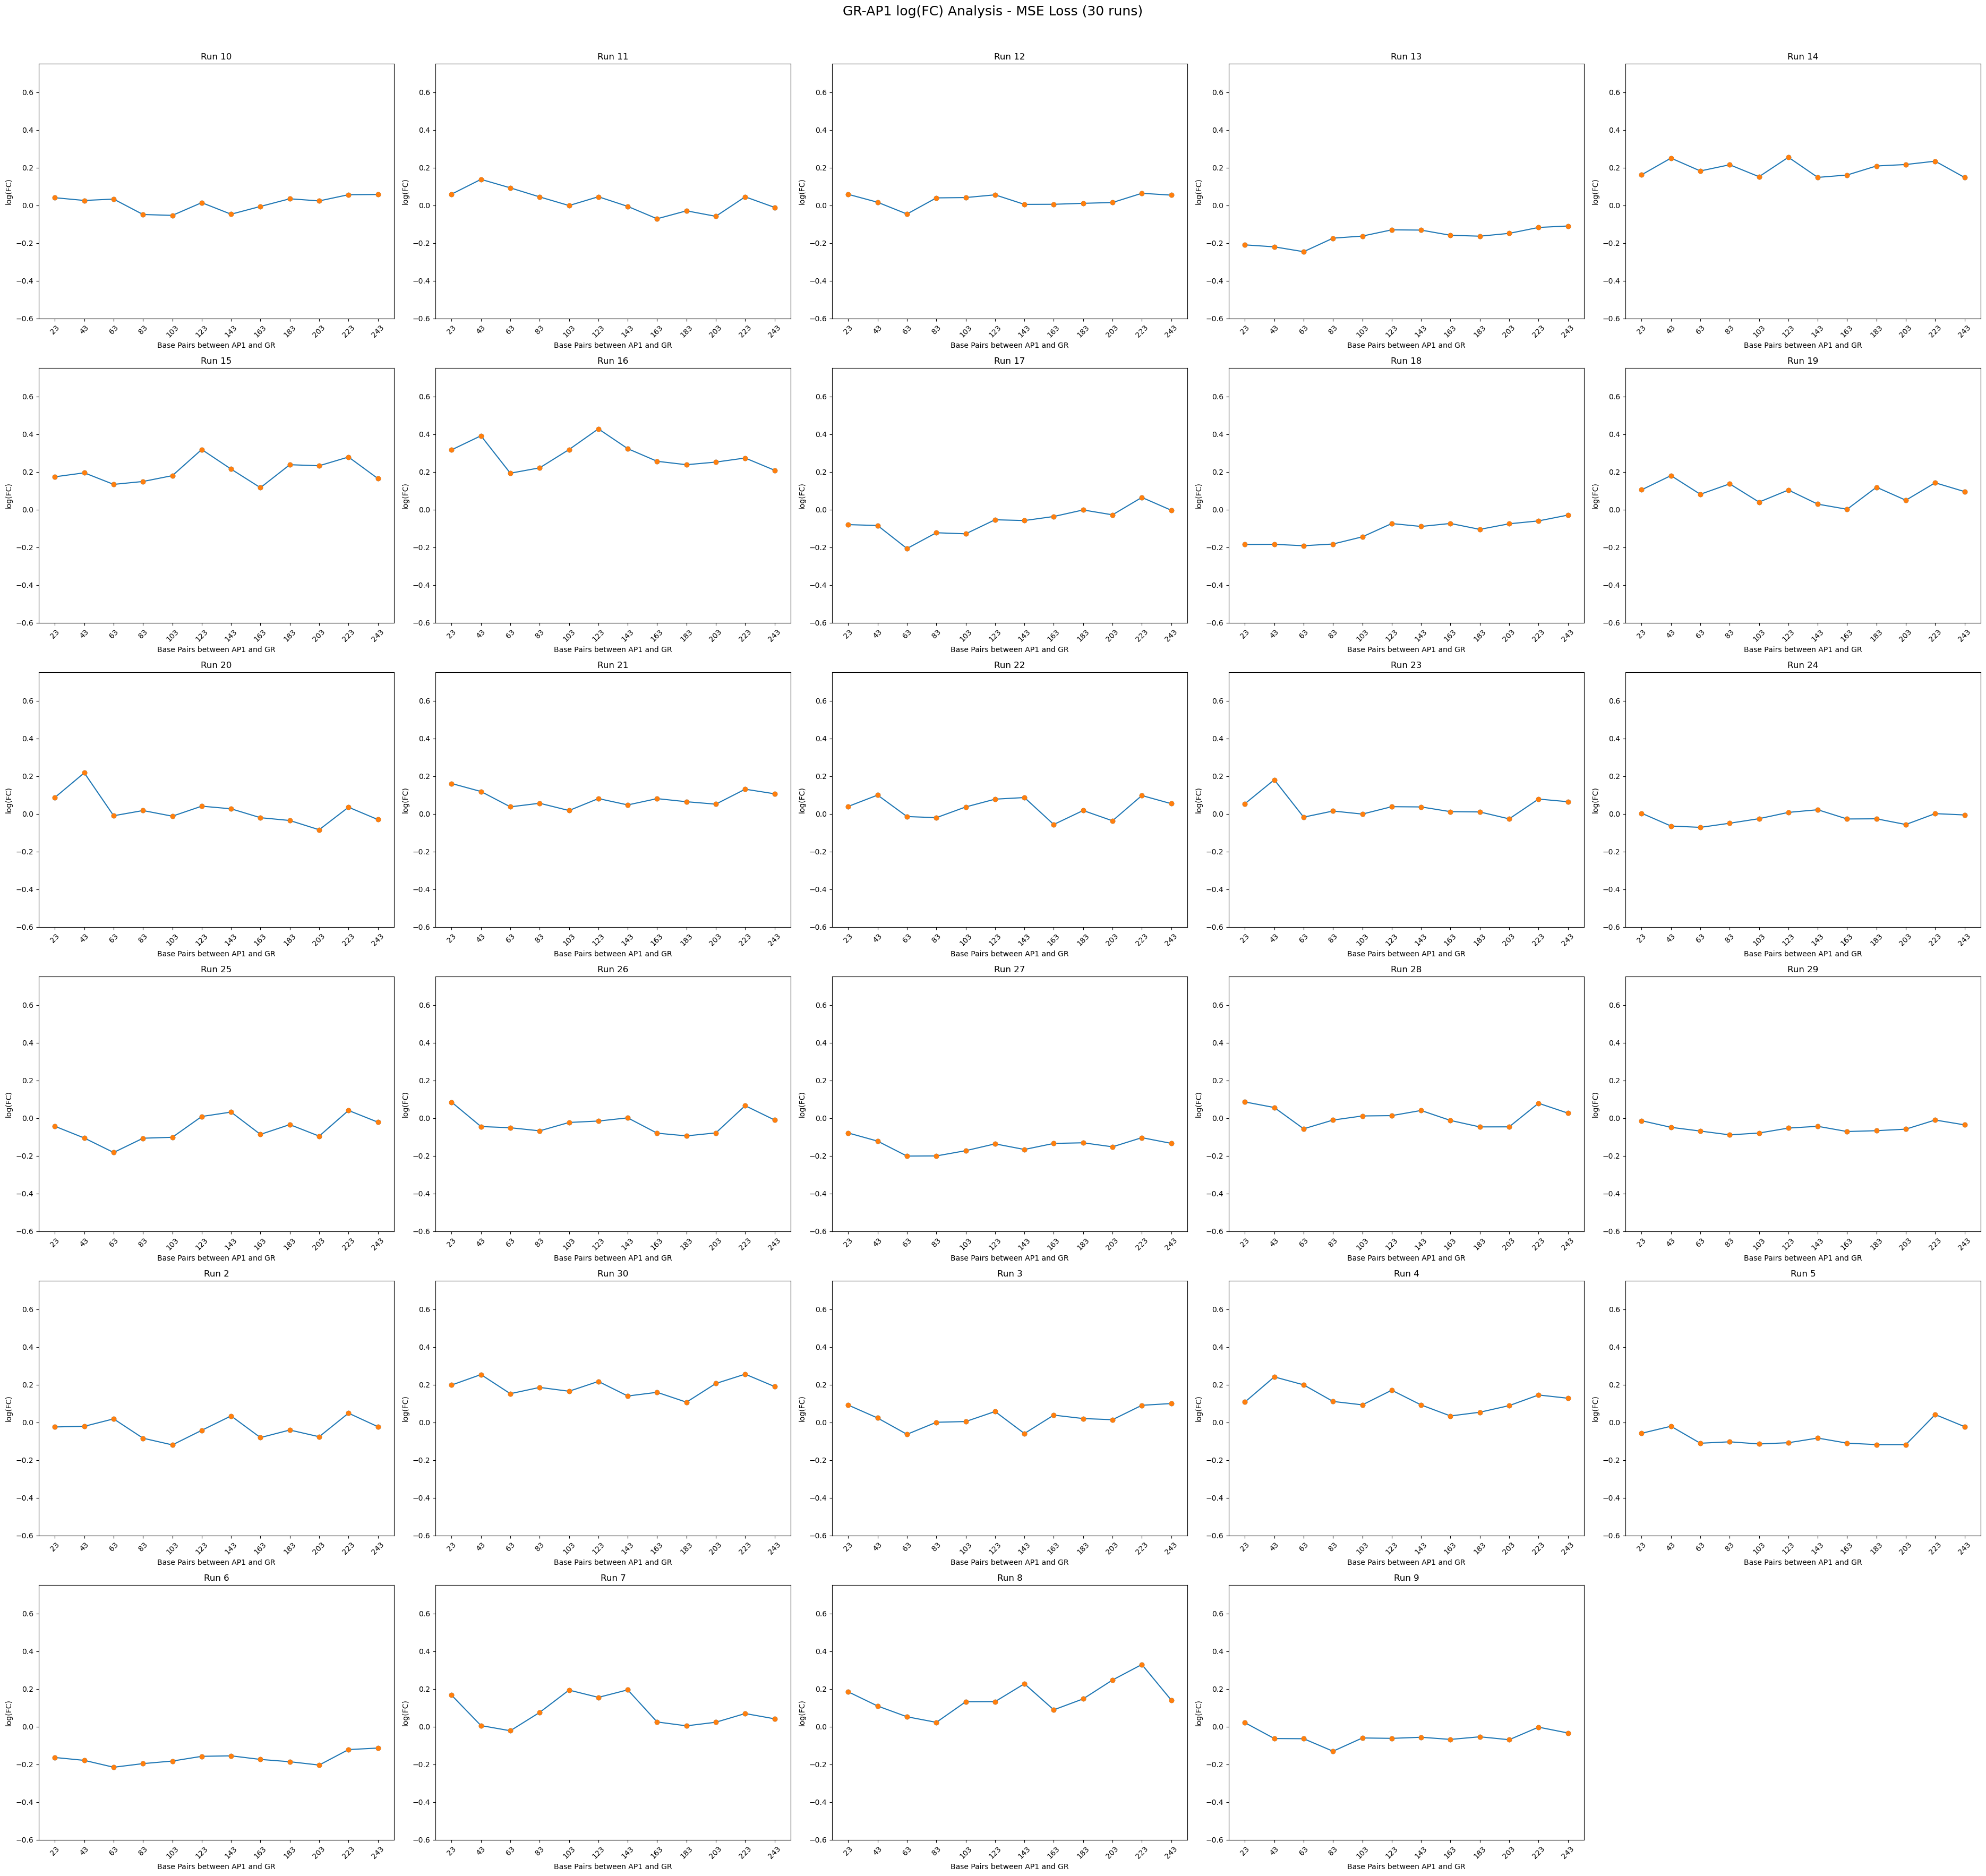

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

data_dir = "/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/"
file_pattern = os.path.join(data_dir, "DMSO_27_DEX_*_MSELoss_original-seq-fc3.txt")
file_list = sorted(glob.glob(file_pattern))

fig, axs = plt.subplots(6, 5, figsize=(37.5, 36))
axs = axs.flatten()  

for idx, file_path in enumerate(file_list):
    df = pd.read_table(file_path, header=None)
    df.columns = ['location', 'DMSO.refScore', 'Dex.refScore', 'sequence']
    
    df['fc'] = df['Dex.refScore'] - df['DMSO.refScore']
    df['dist'] = np.tile(np.arange(23, 244, 20), 1)
    
    df = df.groupby('dist').agg(mean_fc=('fc', 'mean'), sd_fc=('fc', 'std')).reset_index()

    run_id = os.path.basename(file_path).split('_')[3]

    ax = axs[idx]
    ax.plot(df['dist'], df['mean_fc'], marker='o')
    ax.errorbar(df['dist'], df['mean_fc'], yerr=df['sd_fc'], fmt='o', capsize=5)
    ax.set_title(f"Run {run_id}")
    ax.set_xlabel("Base Pairs between AP1 and GR")
    ax.set_ylabel("log(FC)")
    ax.set_ylim(-0.6, 0.75)
    ax.set_xticks(np.arange(23, 244, 20))
    ax.tick_params(axis='x', rotation=45)
    ax.grid(False)

for i in range(len(file_list), len(axs)):
    fig.delaxes(axs[i])

fig.suptitle("GR-AP1 log(FC) Analysis - MSE Loss (30 runs)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
# sns.despine()
plt.show()


### GR-AP1 analysis with latest iteration of training runs

#### 5layer model

In [10]:
%%bash
python /hpc/group/igvf/K562/leave-one-out/BlueSTARR/test-variants-fc.py \
/hpc/home/rv103/igvf/revathy/models/A549/mse_loss/DMSO-200/5-layer/DMSO-20 \
/hpc/home/rv103/igvf/revathy/models/A549/mse_loss/Dex-200/5-layer/Dex-18 \
/hpc/group/igvf/A549/GR-AP1/enhancer-seq/original-seq/original-seq.txt \
/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_20_DEX_18_5layer_MSELoss_original-seq-fc3.txt

2025-06-10 11:51:24.461380: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-10 11:51:24.462119: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-10 11:51:25.391940: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-10 11:51:27.100864: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-10 11:51:48.426547: W tensorflow/comp

Using TensorFlow backend


In [3]:
%%bash
export PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python
python /hpc/group/igvf/K562/leave-one-out/BlueSTARR/test-variants-fc.py \
/hpc/home/rv103/igvf/revathy/models/A549/mse_loss/DMSO-200/6-layer/DMSO-4 \
/hpc/home/rv103/igvf/revathy/models/A549/mse_loss/Dex-200/6-layer/Dex-30 \
/hpc/group/igvf/A549/GR-AP1/enhancer-seq/original-seq/original-seq.txt \
/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_4_DEX_30_6layer_MSELoss_original-seq-fc3.txt

2025-10-27 09:24:14.126759: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-27 09:24:14.126842: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-27 09:24:14.128824: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-27 09:24:14.137519: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
AttributeError: 'MessageFactory' object has n

Using TensorFlow backend


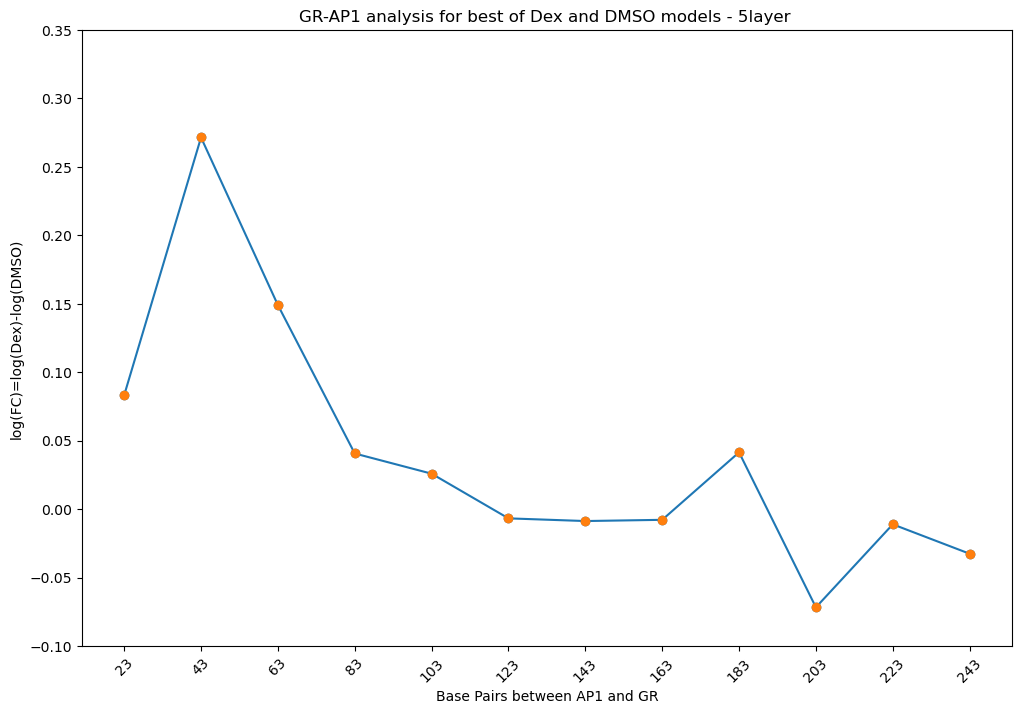

In [14]:
df = pd.read_table('/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_20_DEX_18_5layer_MSELoss_original-seq-fc3.txt',header = None)
df.columns = ['location', 'DMSO.refScore', 'Dex.refScore','sequence'] # log scale
df['fc'] = (df['Dex.refScore']-df['DMSO.refScore'])
# df['fc'] = np.exp(df['Dex.refScore'])/np.exp(df['DMSO.refScore'])

df['dist'] = np.tile(np.arange(23, 244, 20), 1)
df = df.groupby('dist').agg(mean_fc=('fc', 'mean'), sd_fc=('fc', 'std')).reset_index()
x = range(23, 244, 20)
plt.figure(figsize=(12, 8))
plt.plot(df['dist'], df['mean_fc'], marker='o')
plt.title("GR-AP1 analysis for best of Dex and DMSO models - 5layer ")
plt.xlabel("Base Pairs between AP1 and GR")
plt.ylabel("log(FC)=log(Dex)-log(DMSO)")
plt.ylim(-0.1,0.35)
# plt.yscale('linear')
plt.errorbar(df['dist'], df['mean_fc'], yerr=df['sd_fc'], fmt='o', capsize=5)
plt.xticks(np.arange(23, 244, 20), rotation=45)
plt.show()

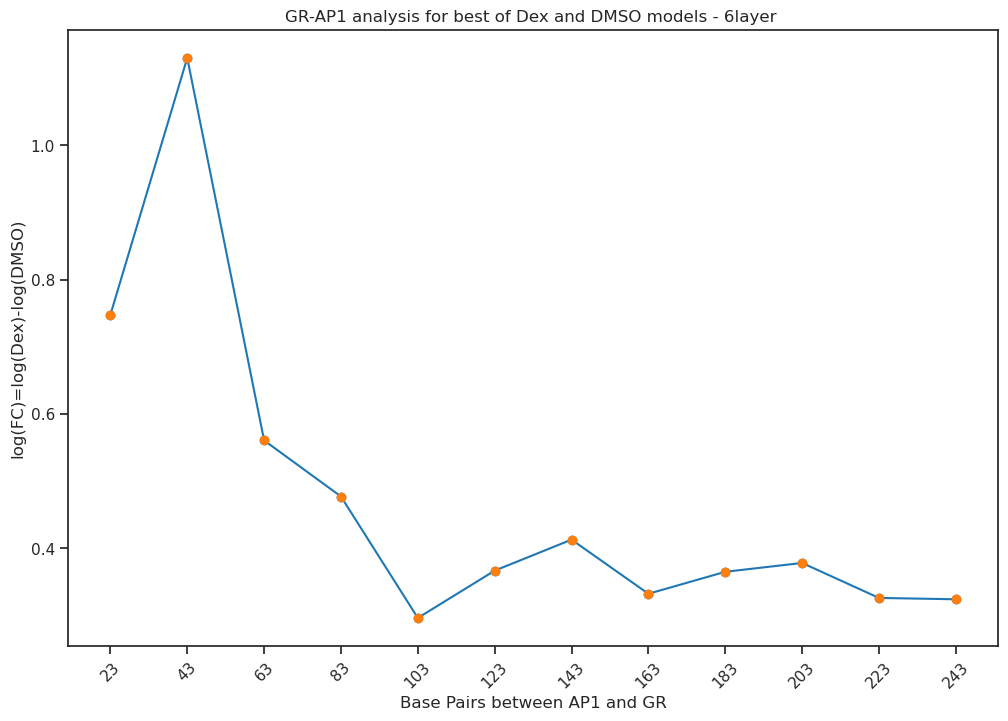

In [8]:
df = pd.read_table('/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_4_DEX_30_6layer_MSELoss_original-seq-fc3.txt',header = None)
df.columns = ['location', 'DMSO.refScore', 'Dex.refScore','sequence'] # log scale
df['fc'] = (df['Dex.refScore']-df['DMSO.refScore'])
# df['fc'] = np.exp(df['Dex.refScore'])/np.exp(df['DMSO.refScore'])

df['dist'] = np.tile(np.arange(23, 244, 20), 1)
df = df.groupby('dist').agg(mean_fc=('fc', 'mean'), sd_fc=('fc', 'std')).reset_index()
x = range(23, 244, 20)
plt.figure(figsize=(12, 8))
plt.plot(df['dist'], df['mean_fc'], marker='o')
plt.title("GR-AP1 analysis for best of Dex and DMSO models - 6layer ")
plt.xlabel("Base Pairs between AP1 and GR")
plt.ylabel("log(FC)=log(Dex)-log(DMSO)")
# plt.ylim(0,0.4)
# plt.yscale('log')
plt.errorbar(df['dist'], df['mean_fc'], yerr=df['sd_fc'], fmt='o', capsize=5)
plt.xticks(np.arange(23, 244, 20), rotation=45)
plt.show()

# Generate High-Res Image

In [6]:
	
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('ticks')
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['lines.markersize'] = 20
sns.set_context('notebook')
%matplotlib inline

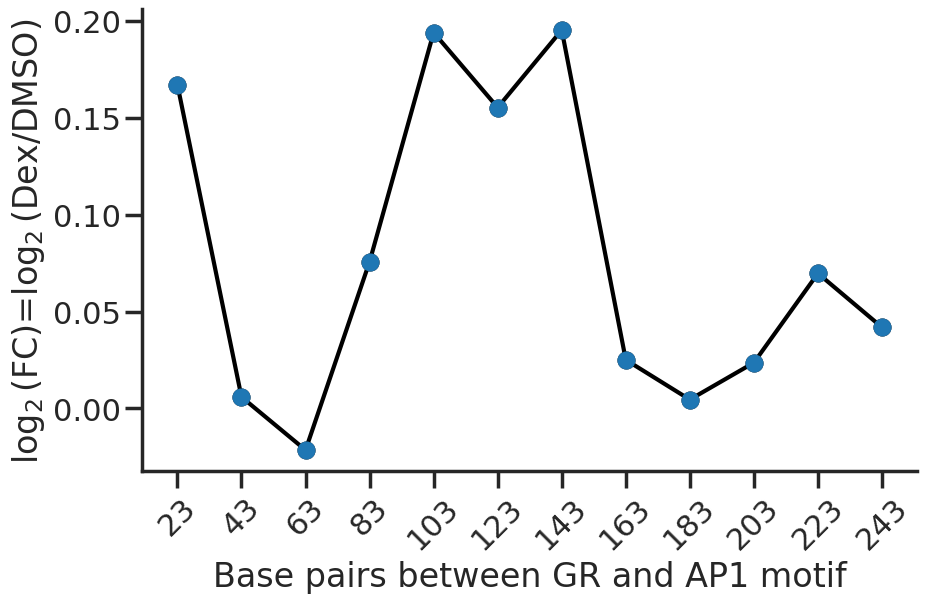

In [7]:

df = pd.read_table('/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_27_DEX_7_MSELoss_original-seq-fc3.txt',header = None)
df.columns = ['location', 'DMSO.refScore', 'Dex.refScore','sequence'] # log scale
df['fc'] = (df['Dex.refScore']-df['DMSO.refScore'])
# df['fc'] = np.exp(df['Dex.refScore'])/np.exp(df['DMSO.refScore'])

df['dist'] = np.tile(np.arange(23, 244, 20), 1)
df = df.groupby('dist').agg(mean_fc=('fc', 'mean'), sd_fc=('fc', 'std')).reset_index()
x = range(23, 244, 20)
plt.figure(figsize=(10, 6))
plt.plot(df['dist'], df['mean_fc'], marker='o', color='black')
# plt.title("GR-AP1 analysis for best of Dex and DMSO models")
plt.xlabel("Base pairs between GR and AP1 motif")
plt.ylabel(r"$\log_2$(FC)=$\log_2$(Dex/DMSO)")
# plt.ylim(-0.1,0.3)
# plt.yscale('log')
plt.errorbar(df['dist'], df['mean_fc'], yerr=df['sd_fc'], fmt='o', capsize=5)
plt.xticks(np.arange(23, 244, 20), rotation=45)
sns.despine()
# plt.savefig('/hpc/home/rv103/igvf/revathy/GR-AP1/plots/GR_AP1_analysis_6layer_model.png')
plt.show()

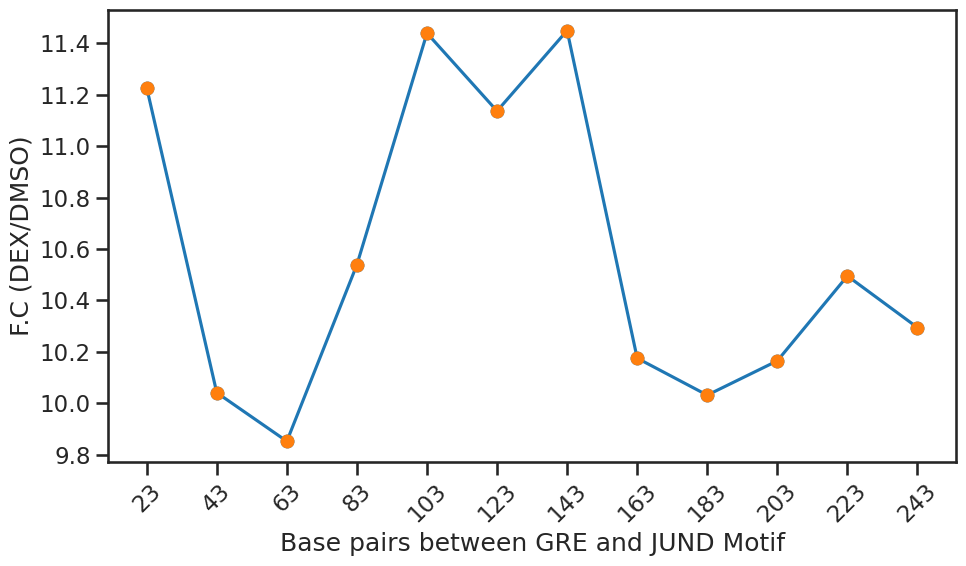

In [8]:

df = pd.read_table('/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/DMSO_27_DEX_7_MSELoss_original-seq-fc3.txt',header = None)
df.columns = ['location', 'DMSO.refScore', 'Dex.refScore','sequence'] # log scale
df['linear.Dex.refScore'] = 2 ** df['Dex.refScore']
df['linear.DMSO.refScore'] = 2 ** df['DMSO.refScore']
df['RNA.Dex'] = df['linear.Dex.refScore'] * 1000
df['RNA.DMSO'] =  df['linear.DMSO.refScore'] * 100
df['log10fc'] = np.log10(df['RNA.Dex']/df['RNA.DMSO'])
df['fc'] = (df['RNA.Dex']/df['RNA.DMSO'])

# # df['fc'] = (df['Dex.refScore']-df['DMSO.refScore'])
# # df['fc'] = np.exp(df['Dex.refScore'])/np.exp(df['DMSO.refScore'])

df['dist'] = np.tile(np.arange(23, 244, 20), 1)
df = df.groupby('dist').agg(mean_fc=('fc', 'mean'), sd_fc=('fc', 'std')).reset_index()
x = range(23, 244, 20)
# plt.figure(figsize=(10, 6))
# plt.plot(df['dist'], df['mean_fc'], marker='o')
# # plt.title("GR-AP1 analysis for best of Dex and DMSO models")
# plt.xlabel("Base Pairs between GR and AP1")
# plt.ylabel(r"$log_{10}(FC)=log(Dex/DMSO)$")
# plt.ylim(-0.05,0.1)
# # plt.yscale('log')
# plt.errorbar(df['dist'], df['mean_fc'], yerr=df['sd_fc'], fmt='o', capsize=5)
# plt.xticks(np.arange(23, 244, 20), rotation=45)
# # plt.savefig('/hpc/home/rv103/igvf/revathy/GR-AP1/plots/GR_AP1_analysis_6layer_model.png')
# plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df['dist'], df['mean_fc'], marker='o')
plt.errorbar(df['dist'], df['mean_fc'], yerr=df['sd_fc'], fmt='o', capsize=5)
# plt.yscale('log')
plt.xlabel("Base pairs between GRE and JUND Motif")
plt.ylabel("F.C (DEX/DMSO)")
plt.xticks(np.arange(23, 244, 20), rotation=45)
# plt.ylim(1, 100)
# plt.yticks([1,3,10,30,100])
plt.tight_layout()
plt.show()

In [4]:
%%bash
zcat /hpc/home/rv103/igvf/A549/full-set/DMSO-200/300-bases/data-normalized/all-train-counts.txt.gz | awk '
{
  for (i = 1; i <= 5; i++) {
    sum[i] += $i;
  }
  n++;
}
END {
  for (i = 1; i <= 5; i++) {
    printf "Mean of column %d: %.4f\n", i, sum[i]/n;
  }
}'


Mean of column 1: 1.6055
Mean of column 2: 1.5977
Mean of column 3: 1.6127
Mean of column 4: 1.5685
Mean of column 5: 1.5826


In [8]:
(1.6055 + 1.5977 + 1.6127 + 1.5685 + 1.5826 )/5


1.5934000000000001

In [9]:
%%bash
zcat /hpc/home/rv103/igvf/A549/full-set/Dex-200/300-bases/data-normalized/all-train-counts.txt.gz | awk '
{
  for (i = 1; i <= 5; i++) {
    sum[i] += $i;
  }
  n++;
}
END {
  for (i = 1; i <= 5; i++) {
    printf "Mean of column %d: %.4f\n", i, sum[i]/n;
  }
}'


Mean of column 1: 1.5256
Mean of column 2: 1.5186
Mean of column 3: 1.5317
Mean of column 4: 1.4935
Mean of column 5: 1.5062


In [10]:
(1.5256+1.5186+1.5317+1.4935+1.5062)/5

1.51512

In [20]:
import pandas as pd

original_seq = pd.read_csv('/hpc/group/igvf/A549/GR-AP1/enhancer-seq/original-seq/original-seq.txt', sep='\t', names=['ID','ref_allele','ref','sequence'])
original_seq['sequence'][0][242:253]


'CCGGGACTGGT'

# test

In [8]:
%%bash
python /hpc/group/igvf/K562/leave-one-out/BlueSTARR/test-variants-fc.py \
/hpc/home/rv103/igvf/revathy/models/A549/mse_loss/DMSO-200/DMSO-27 \
/hpc/home/rv103/igvf/revathy/models/A549/mse_loss/Dex-200/Dex-7 \
/hpc/group/igvf/A549/GR-AP1/enhancer-seq/original-seq/original-seq.txt \
/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/test_DMSO_27_DEX_7_MSELoss_original-seq-fc3.txt

2025-10-02 08:06:59.988986: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-02 08:06:59.989043: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-02 08:06:59.990407: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-02 08:06:59.997282: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-02 08:07:02.436450: W tensorflow/comp

Using TensorFlow backend


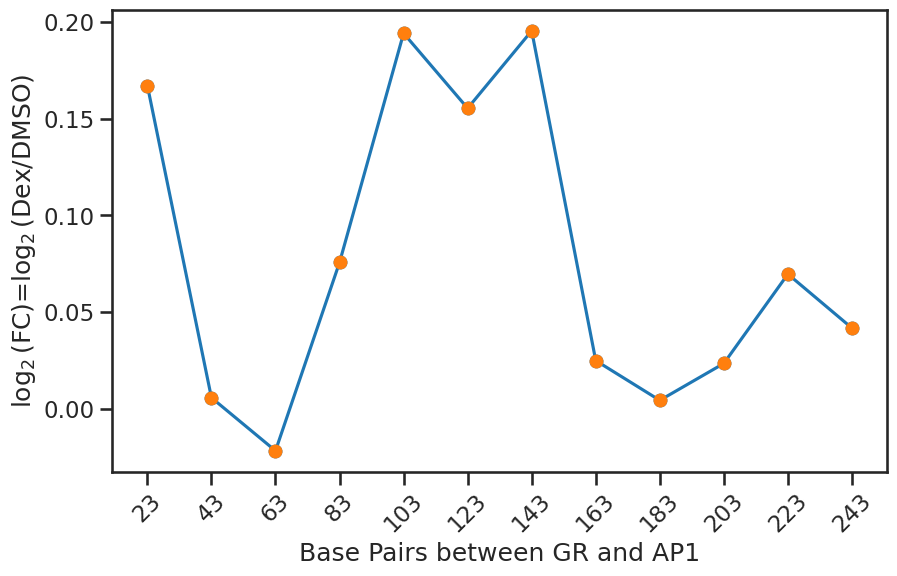

In [9]:

df = pd.read_table('/hpc/home/rv103/igvf/revathy/GR-AP1/logFC/test_DMSO_27_DEX_7_MSELoss_original-seq-fc3.txt',header = None)
df.columns = ['location', 'DMSO.refScore', 'Dex.refScore','sequence'] # log scale
df['fc'] = (df['Dex.refScore']-df['DMSO.refScore'])
# df['fc'] = np.exp(df['Dex.refScore'])/np.exp(df['DMSO.refScore'])

df['dist'] = np.tile(np.arange(23, 244, 20), 1)
df = df.groupby('dist').agg(mean_fc=('fc', 'mean'), sd_fc=('fc', 'std')).reset_index()
x = range(23, 244, 20)
plt.figure(figsize=(10, 6))
plt.plot(df['dist'], df['mean_fc'], marker='o')
# plt.title("GR-AP1 analysis for best of Dex and DMSO models")
plt.xlabel("Base Pairs between GR and AP1")
plt.ylabel(r"$\log_2$(FC)=$\log_2$(Dex/DMSO)")
# plt.ylim(-0.1,0.3)
# plt.yscale('log')
plt.errorbar(df['dist'], df['mean_fc'], yerr=df['sd_fc'], fmt='o', capsize=5)
plt.xticks(np.arange(23, 244, 20), rotation=45)
# plt.savefig('/hpc/home/rv103/igvf/revathy/GR-AP1/plots/GR_AP1_analysis_6layer_model.png')
plt.show()